# Exploratory Data Analysis of Engineered Features

In [184]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.reset_defaults
sns.set_style(style='darkgrid')
sns.set_context(context='poster')
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
font = {'size'   : 16}
plt.rc('font', **font)
plt.ion()
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams["figure.figsize"] = (20.0, 10.0)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)
import warnings
warnings.filterwarnings('ignore')

In [185]:
df = pd.read_csv('../data/processed/transformed_data_with_features_for_eda.csv')

In [186]:
df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'date_registration',
       'date_unregistration', 'module_presentation_length',
       'module_not_completed', 'final_result_num', 'sum_click_dataplus',
       'sum_click_dualpane', 'sum_click_externalquiz', 'sum_click_folder',
       'sum_click_forumng', 'sum_click_glossary', 'sum_click_homepage',
       'sum_click_htmlactivity', 'sum_click_oucollaborate',
       'sum_click_oucontent', 'sum_click_ouelluminate', 'sum_click_ouwiki',
       'sum_click_page', 'sum_click_questionnaire', 'sum_click_quiz',
       'sum_click_repeatactivity', 'sum_click_resource',
       'sum_click_sharedsubpage', 'sum_click_subpage', 'sum_click_url',
       'sum_days_vle_accessed', 'max_clicks_one_day',
       'first_date_vle_accessed', 'estimated_final_score', 'avg_score',
       'avg_days_sub_early', 

In [164]:
def re_encode_target(dataframe):
    # create numeric column for final_result
    final_result_numeric = []
    for idx, row in dataframe.iterrows():
        if row['final_result_num'] == '0_Withdrawn':
            final_result_numeric.append(0)
        elif row['final_result_num'] == '1_Fail':
            final_result_numeric.append(1)
        elif row['final_result_num'] == '2_Pass':
            final_result_numeric.append(2)
        else:
            final_result_numeric.append(3)

    dataframe['final_result_numeric'] = final_result_numeric

    return dataframe.drop('final_result_num', axis=1)

In [165]:
df = re_encode_target(df)

In [166]:
i = df[df['date_unregistration'].isnull()].index.tolist()
df = df.iloc[i]

In [167]:
finished = df[(df['final_result_numeric'] == 2) | (df['final_result_numeric'] == 3) ]

In [168]:
finished['final_result_numeric'].value_counts()

2    12361
3     3024
Name: final_result_numeric, dtype: int64

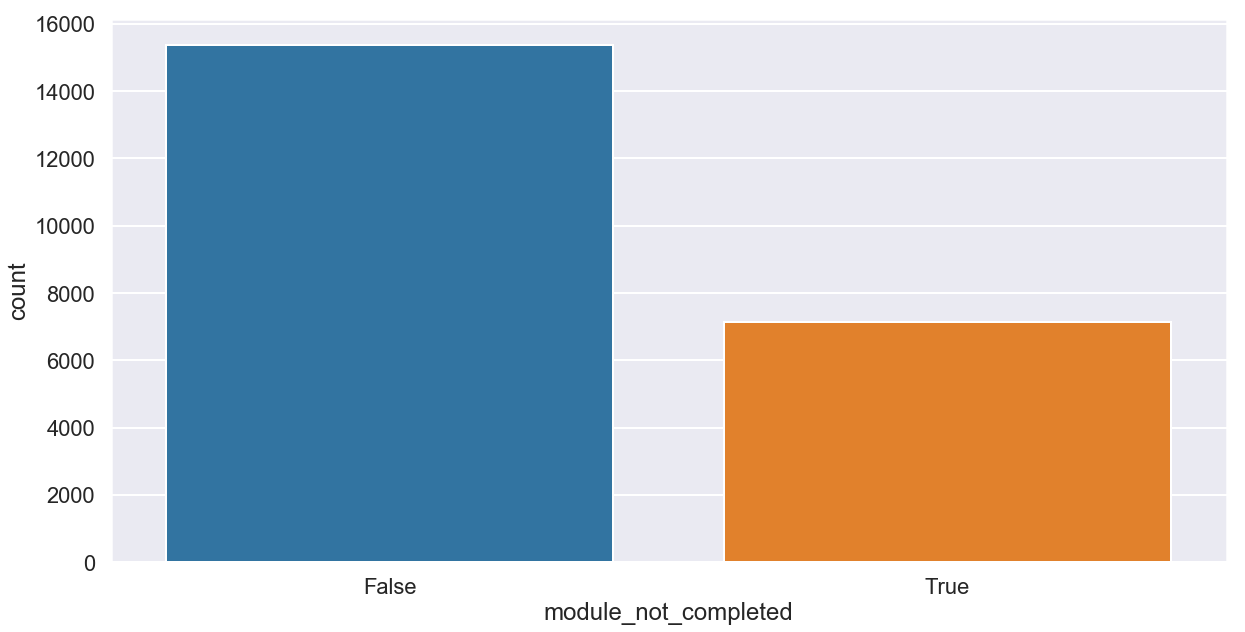

In [169]:
# what proportion of people complete?
sns.countplot(df['module_not_completed'])

## Engineered Feature Analysis

### Bivariate Plots Against Targets: final_result_num, estimated_final_score

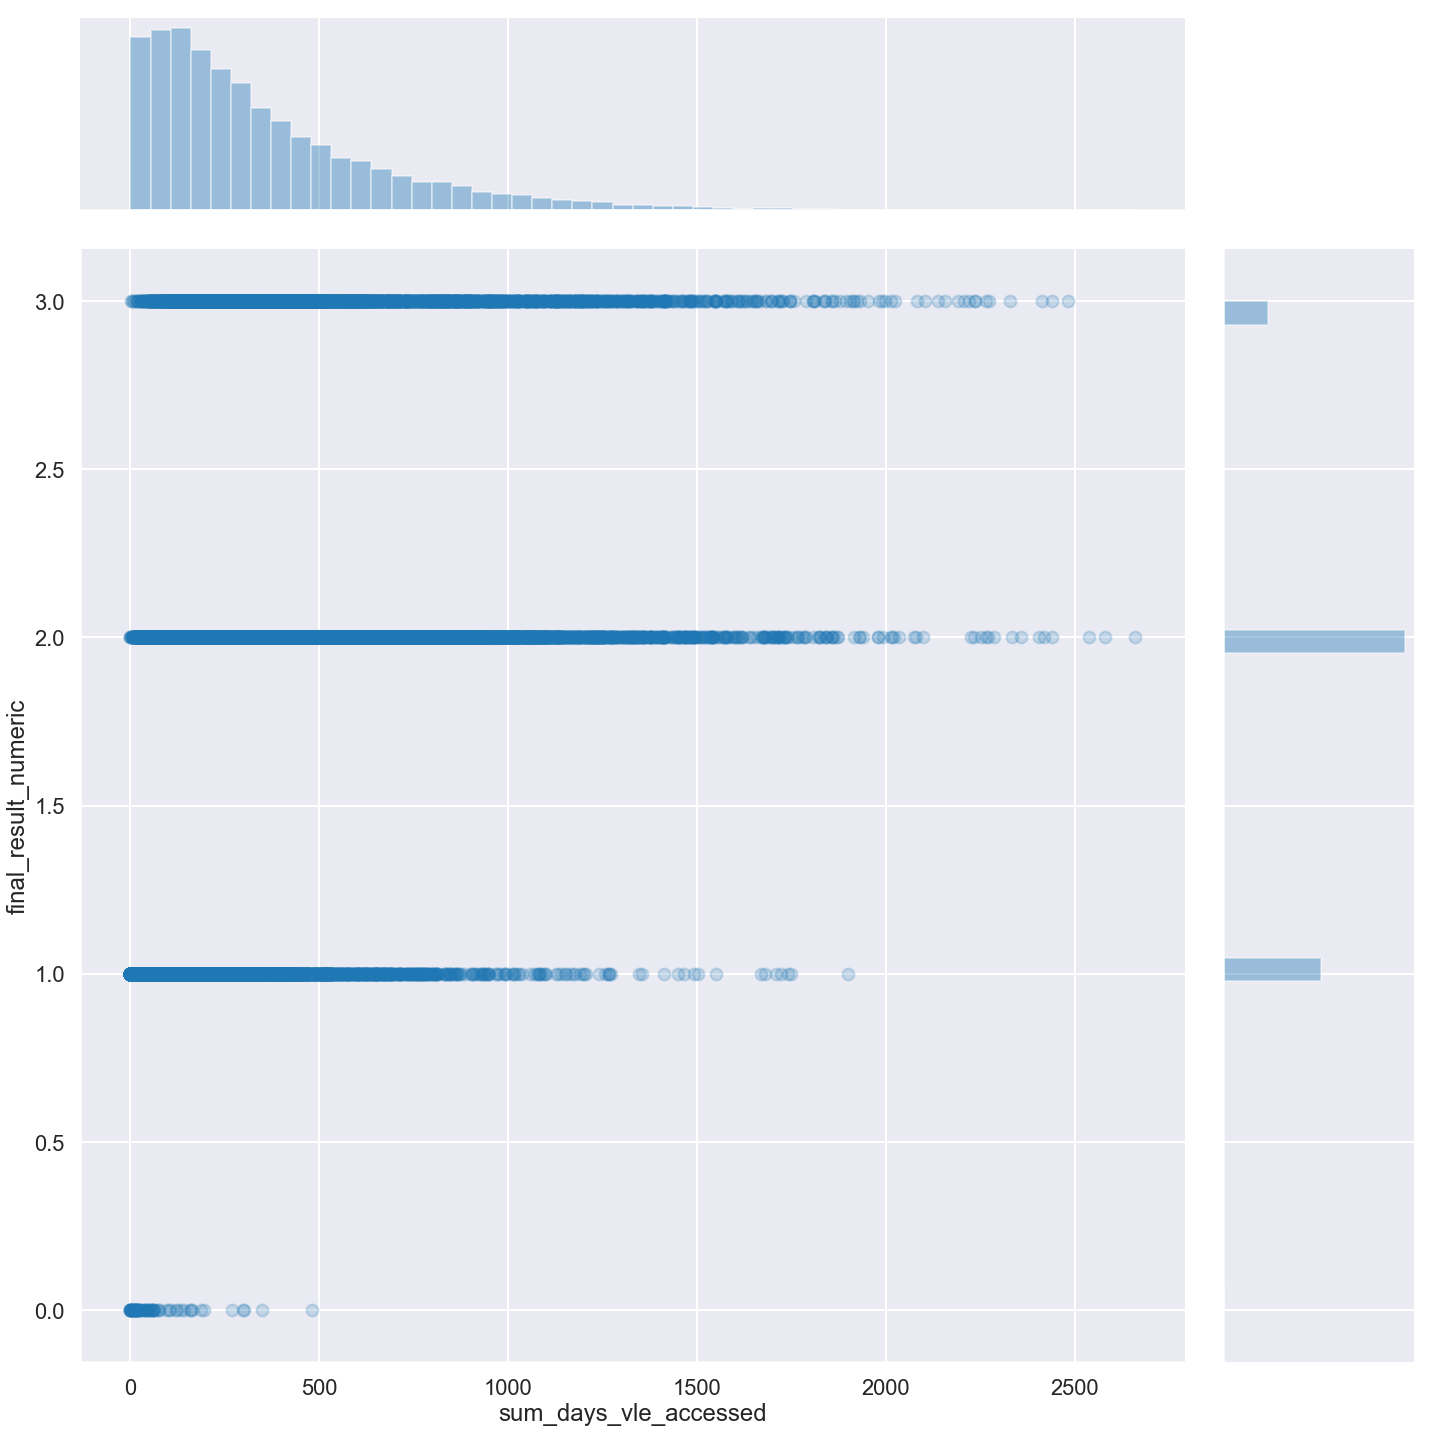

In [173]:
sns.jointplot(x='sum_days_vle_accessed', y='final_result_numeric', data=df, size=20, alpha=0.2)

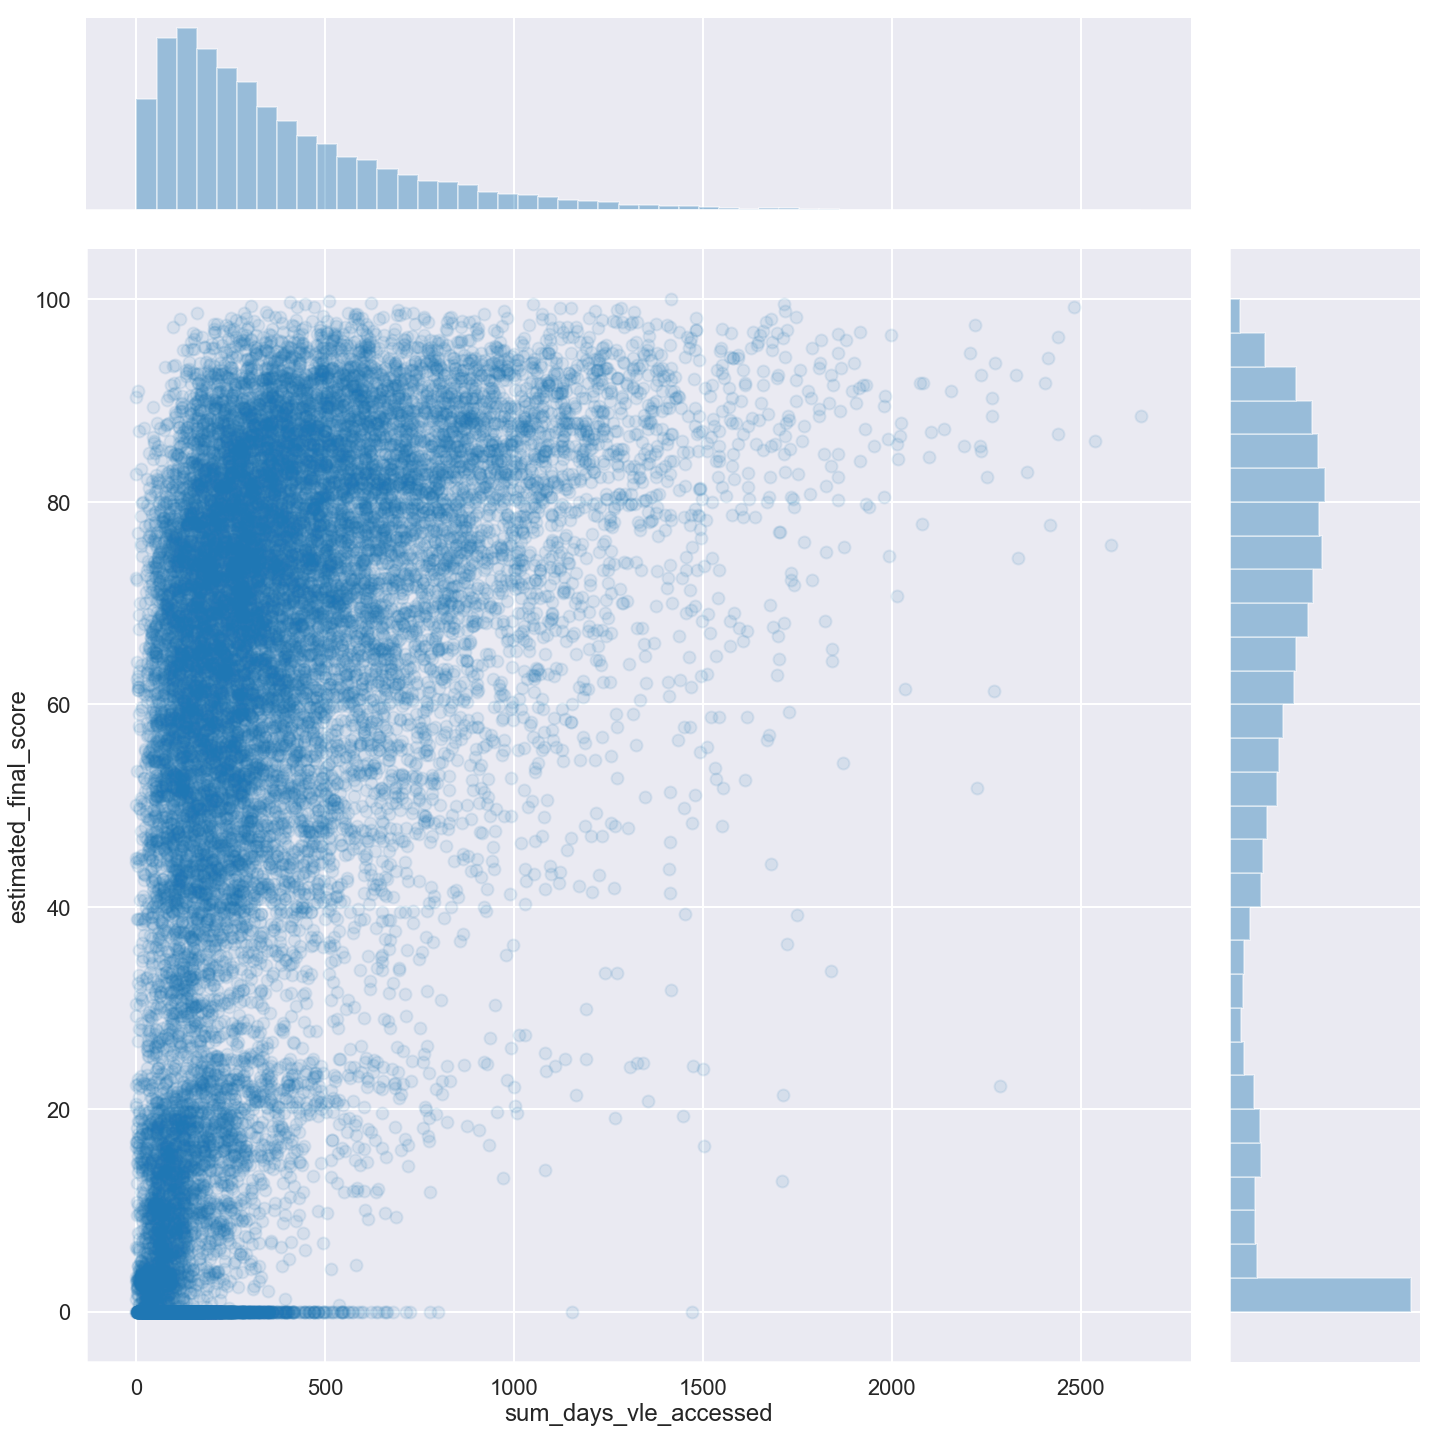

In [174]:
sns.jointplot(x='sum_days_vle_accessed', y='estimated_final_score', data=df, size=20, alpha=0.1)

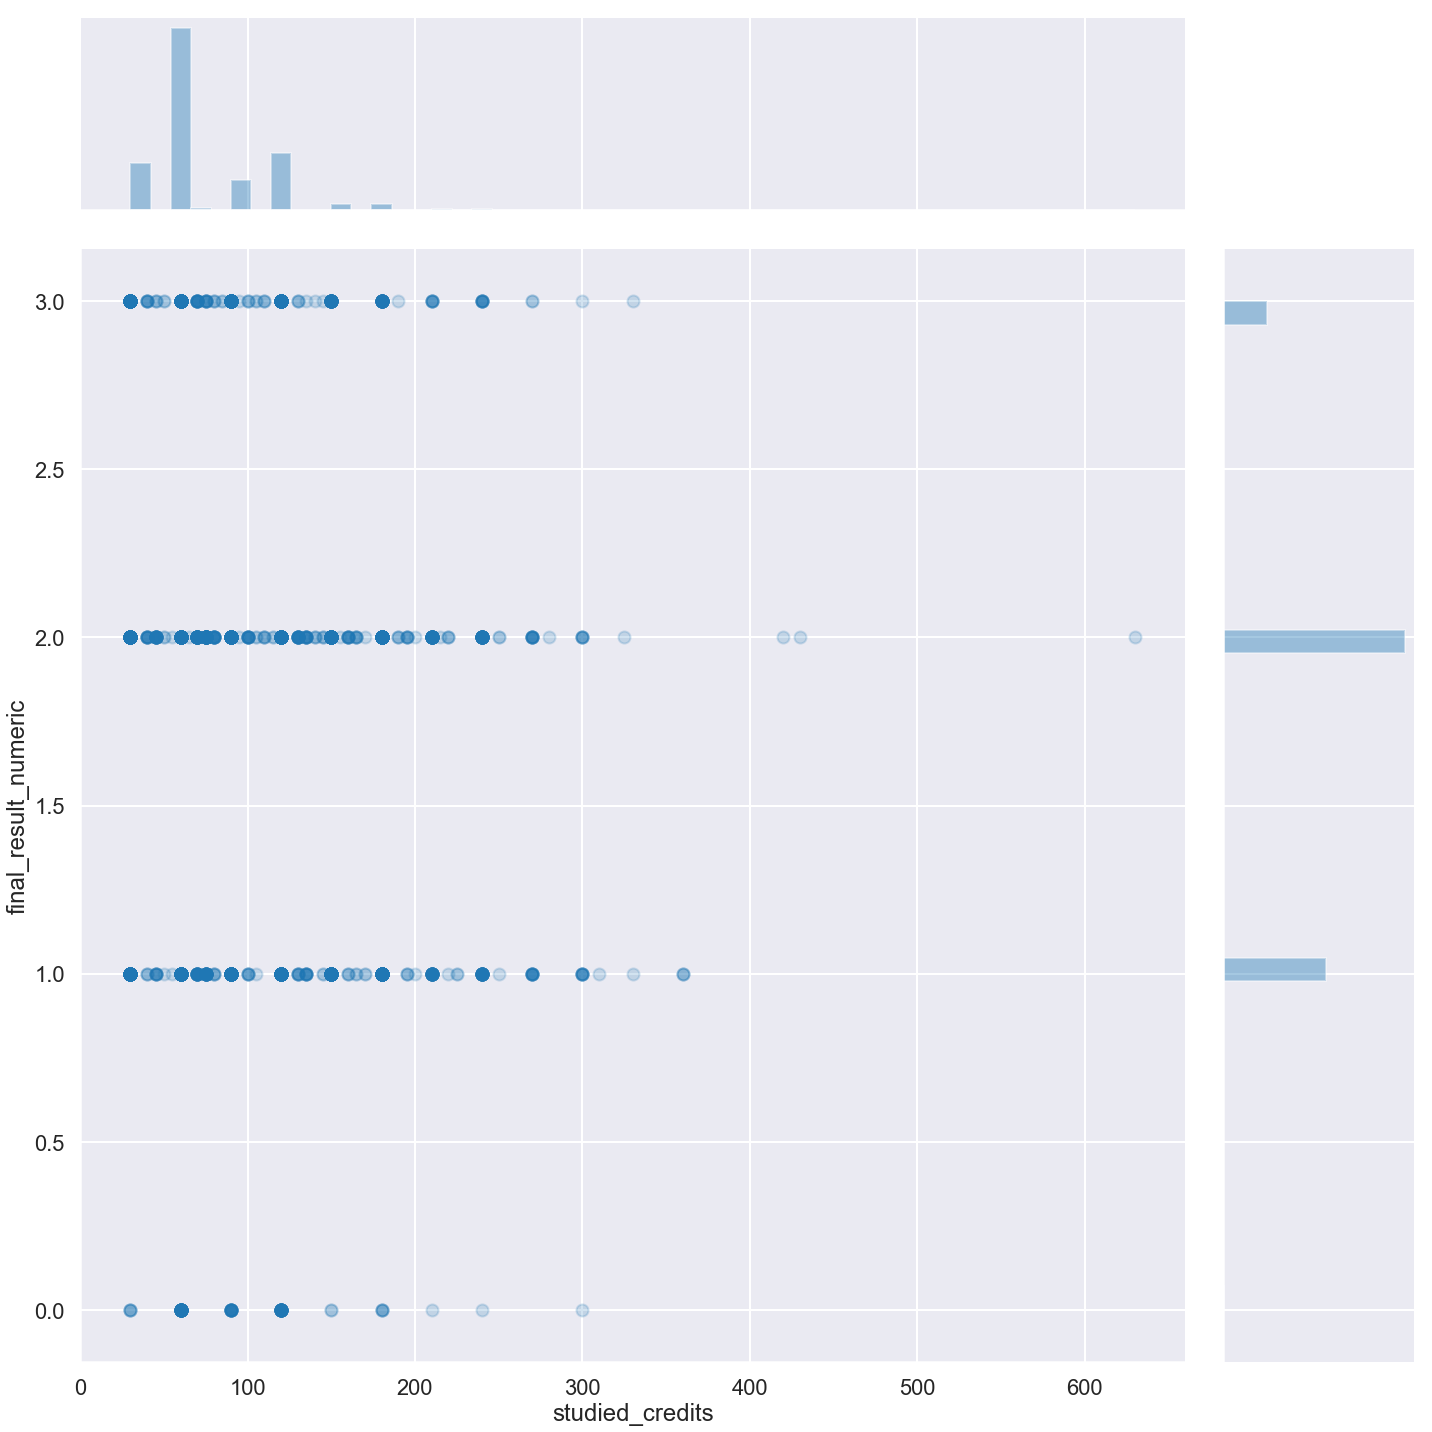

In [175]:
sns.jointplot(x='studied_credits', y='final_result_numeric', data=df, size=20, alpha=0.2)

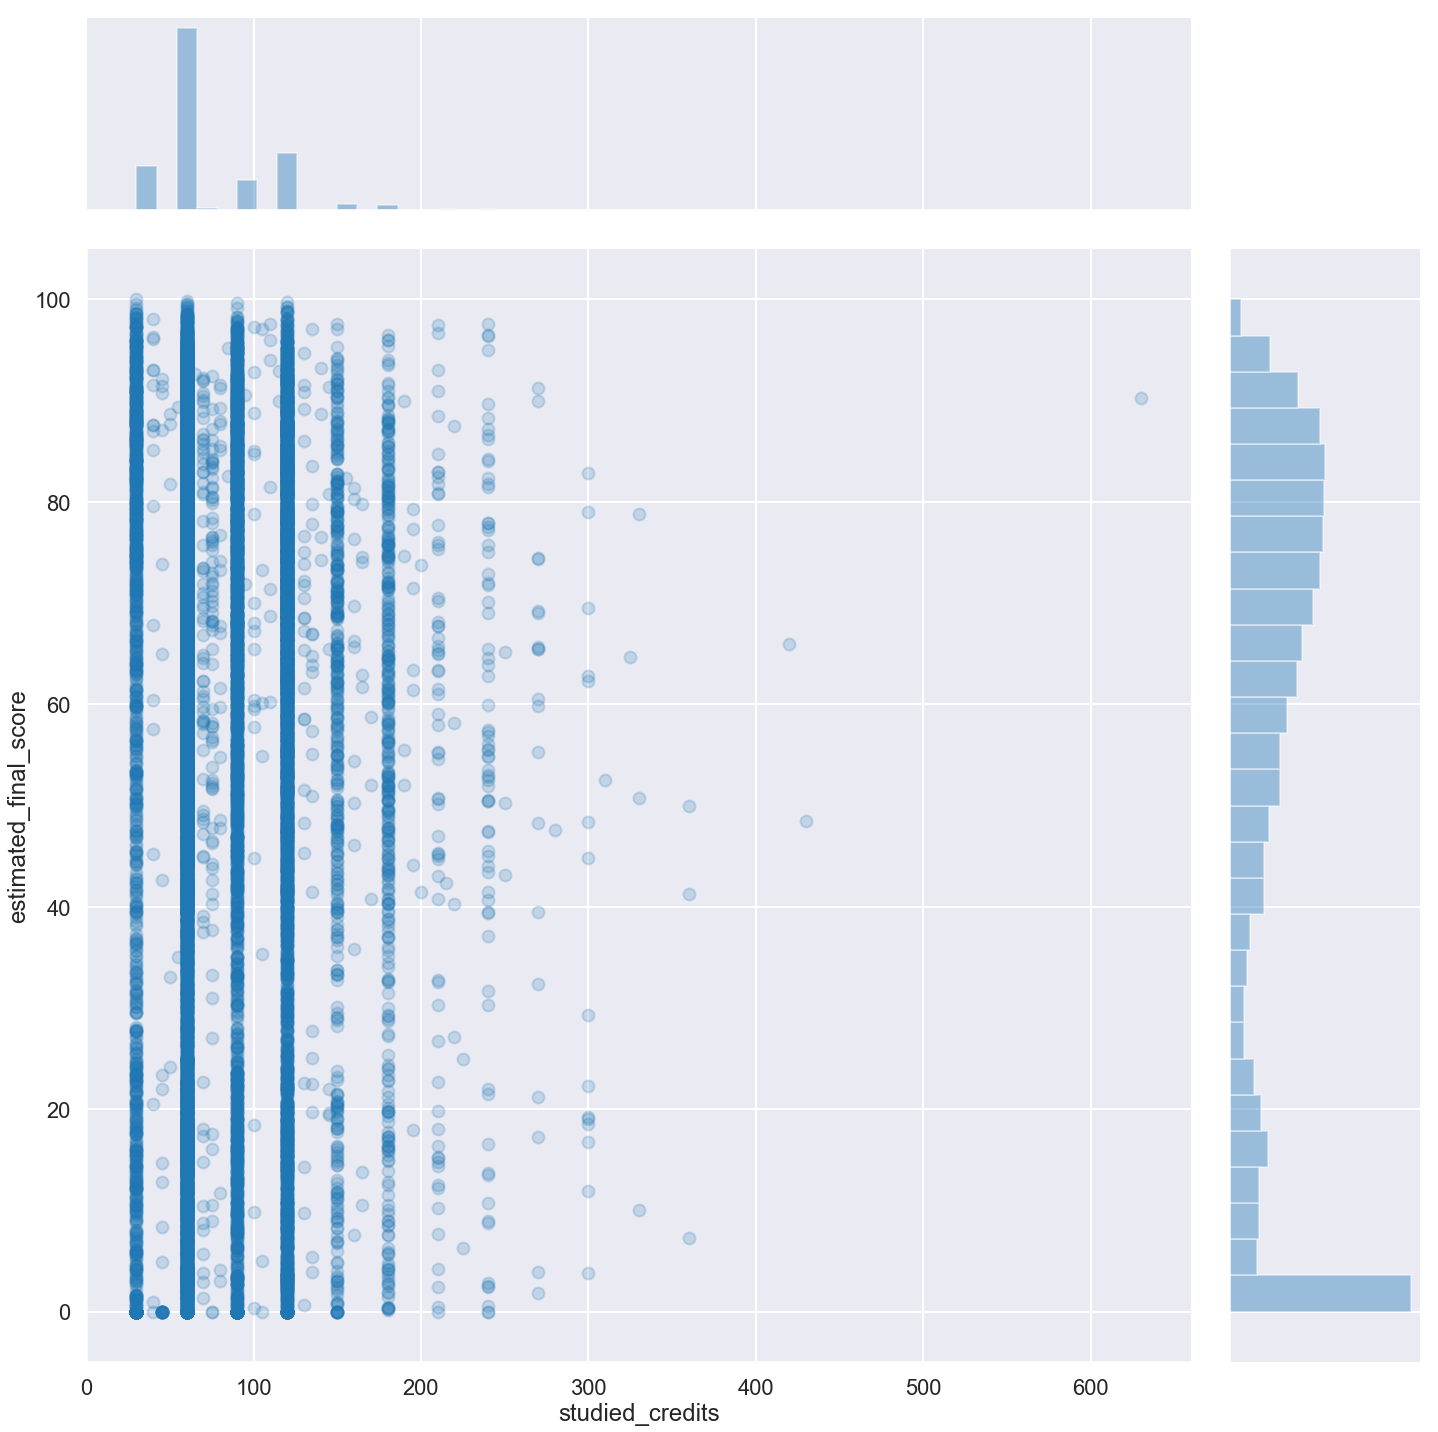

In [82]:
sns.jointplot(x='studied_credits', y='estimated_final_score', data=df, size=20, alpha=0.2)

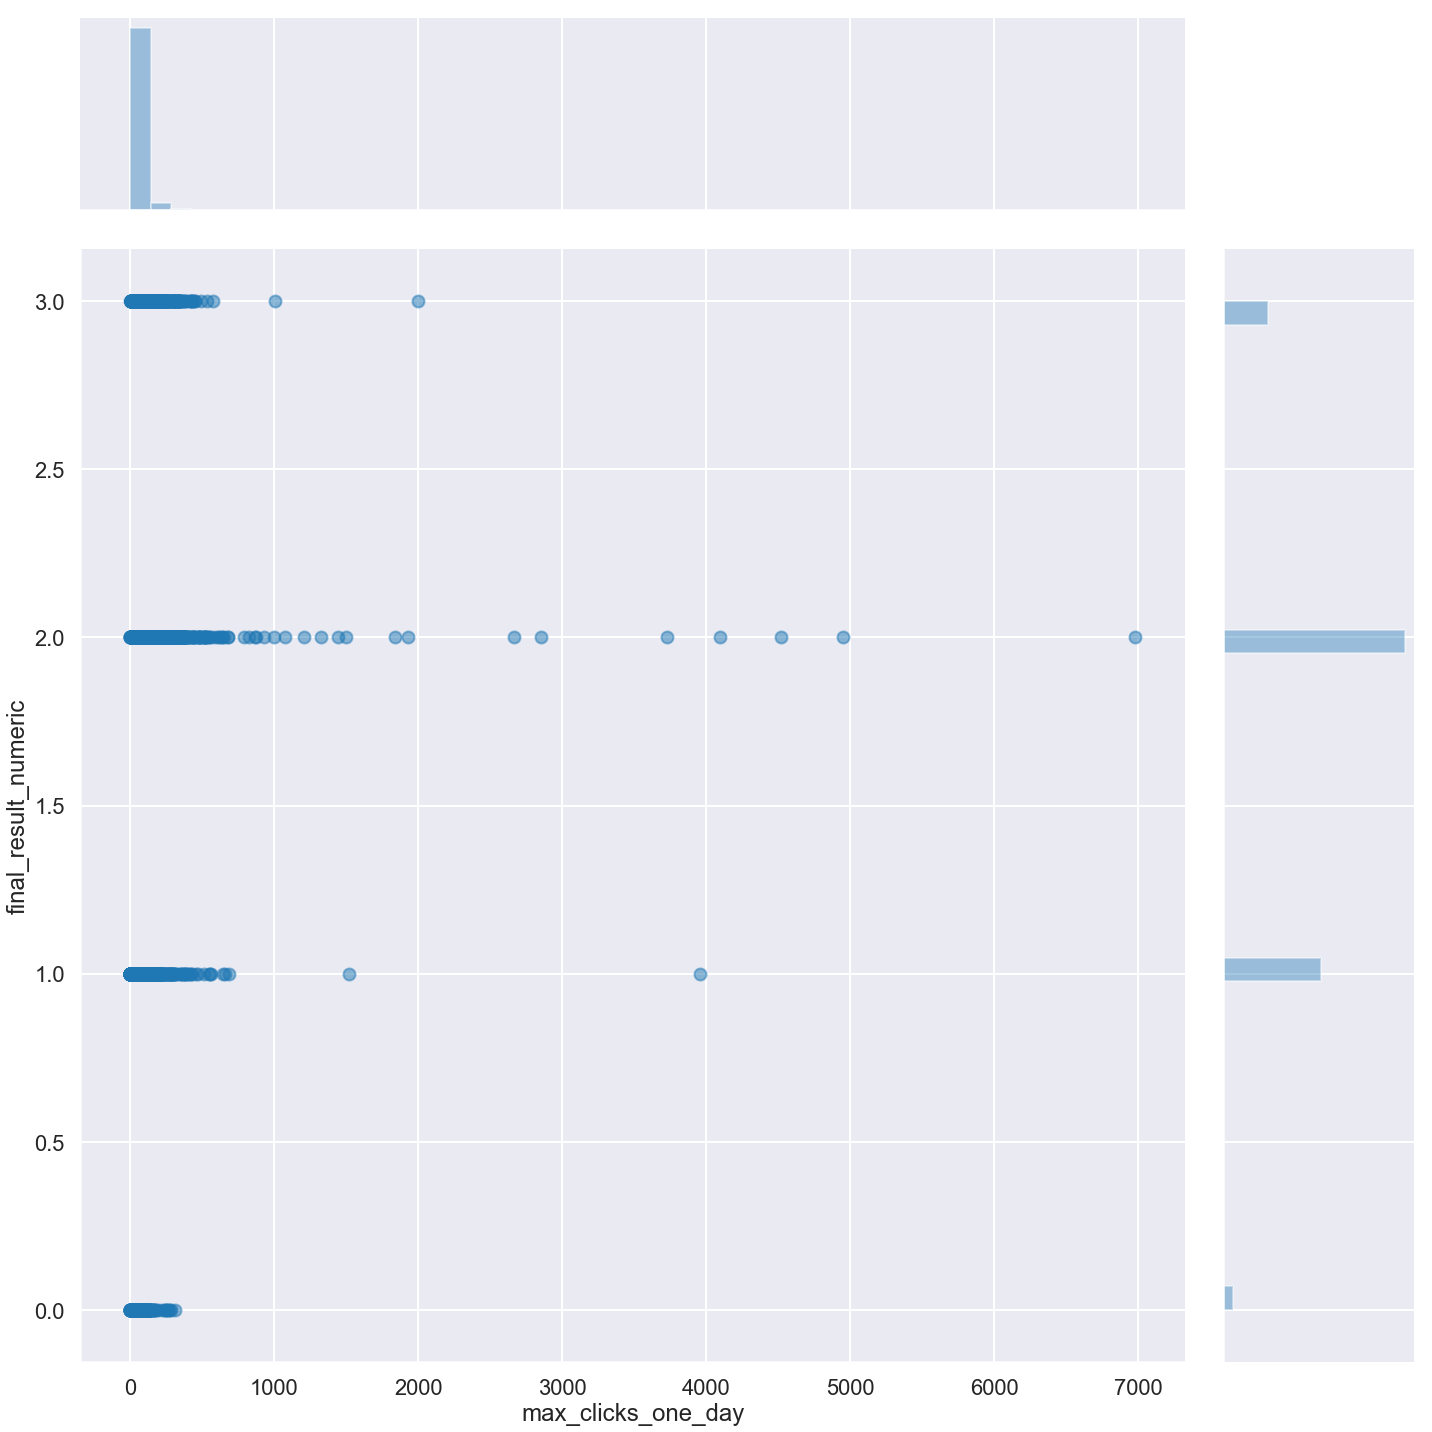

In [83]:
sns.jointplot(x='max_clicks_one_day', y='final_result_numeric', data=df, size=20, alpha=0.5)

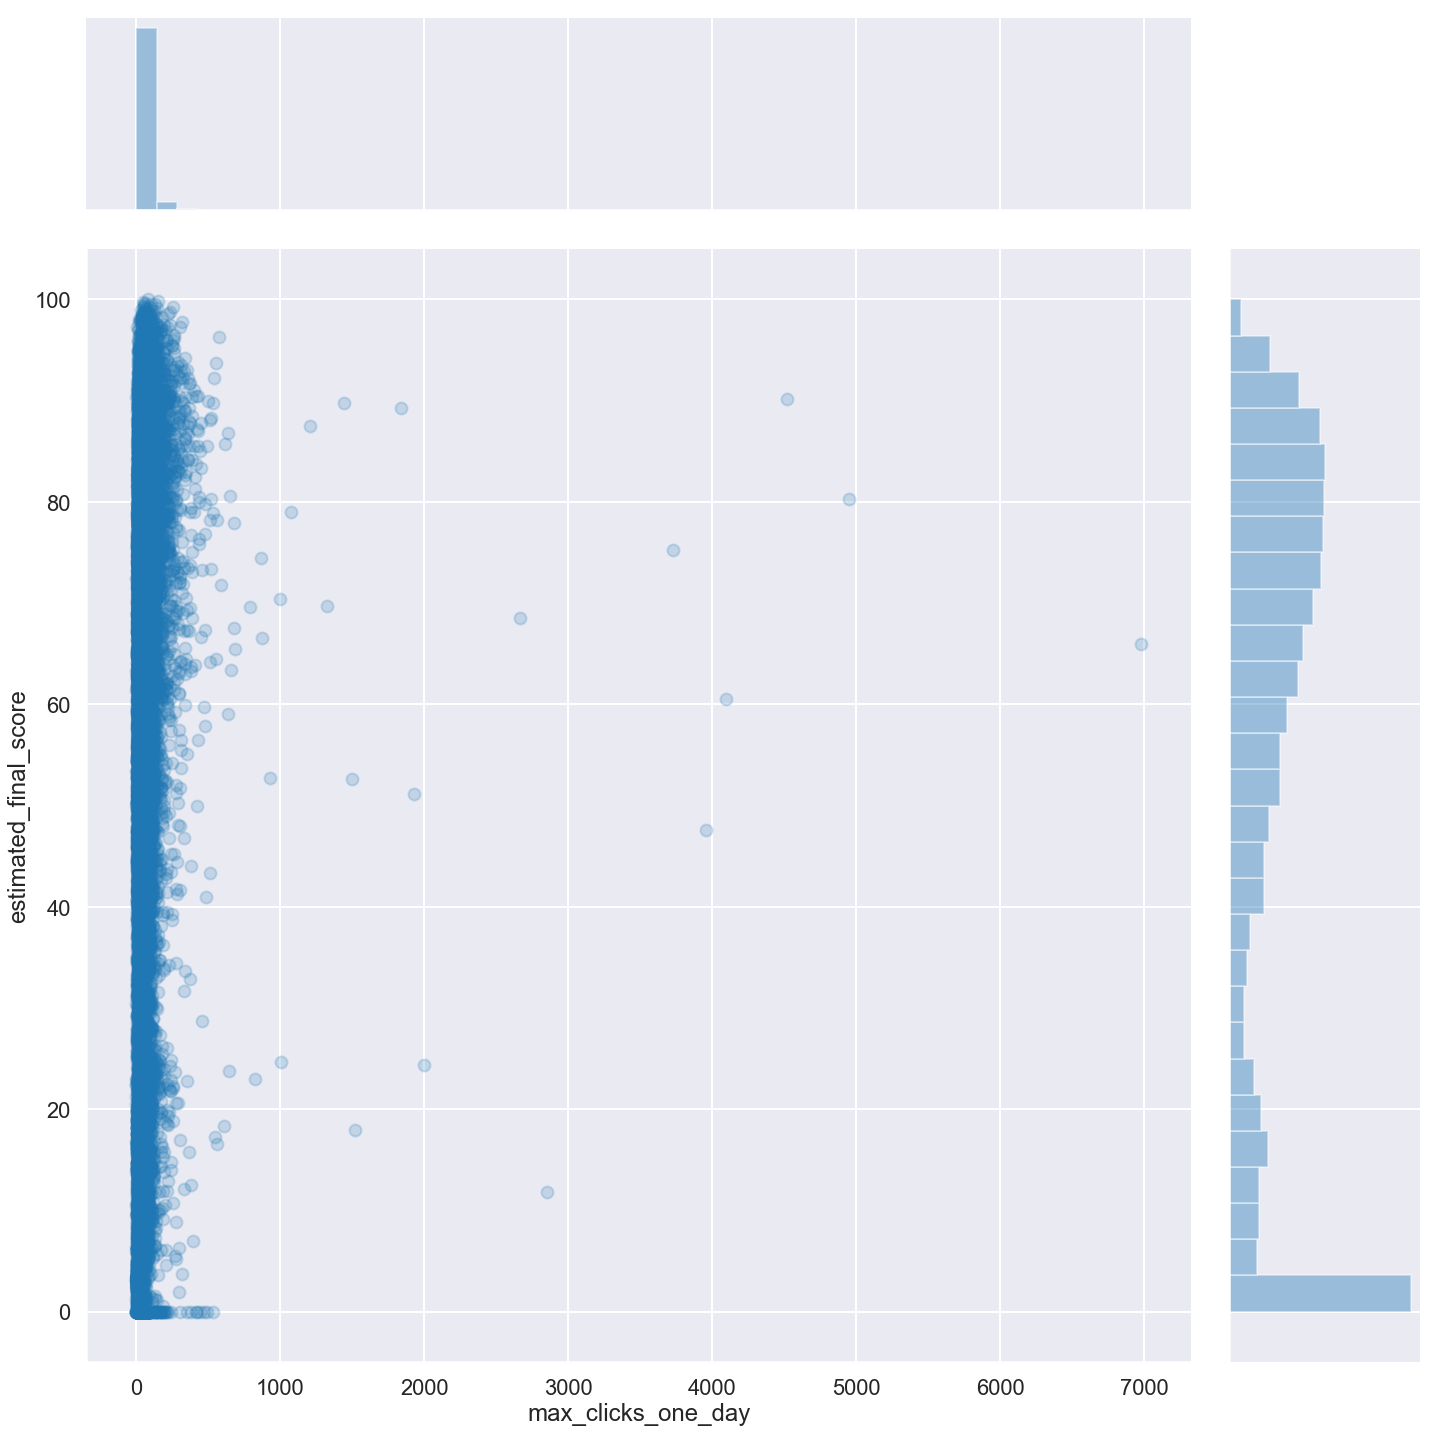

In [84]:
sns.jointplot(x='max_clicks_one_day', y='estimated_final_score', data=df, size=20, alpha=0.2)

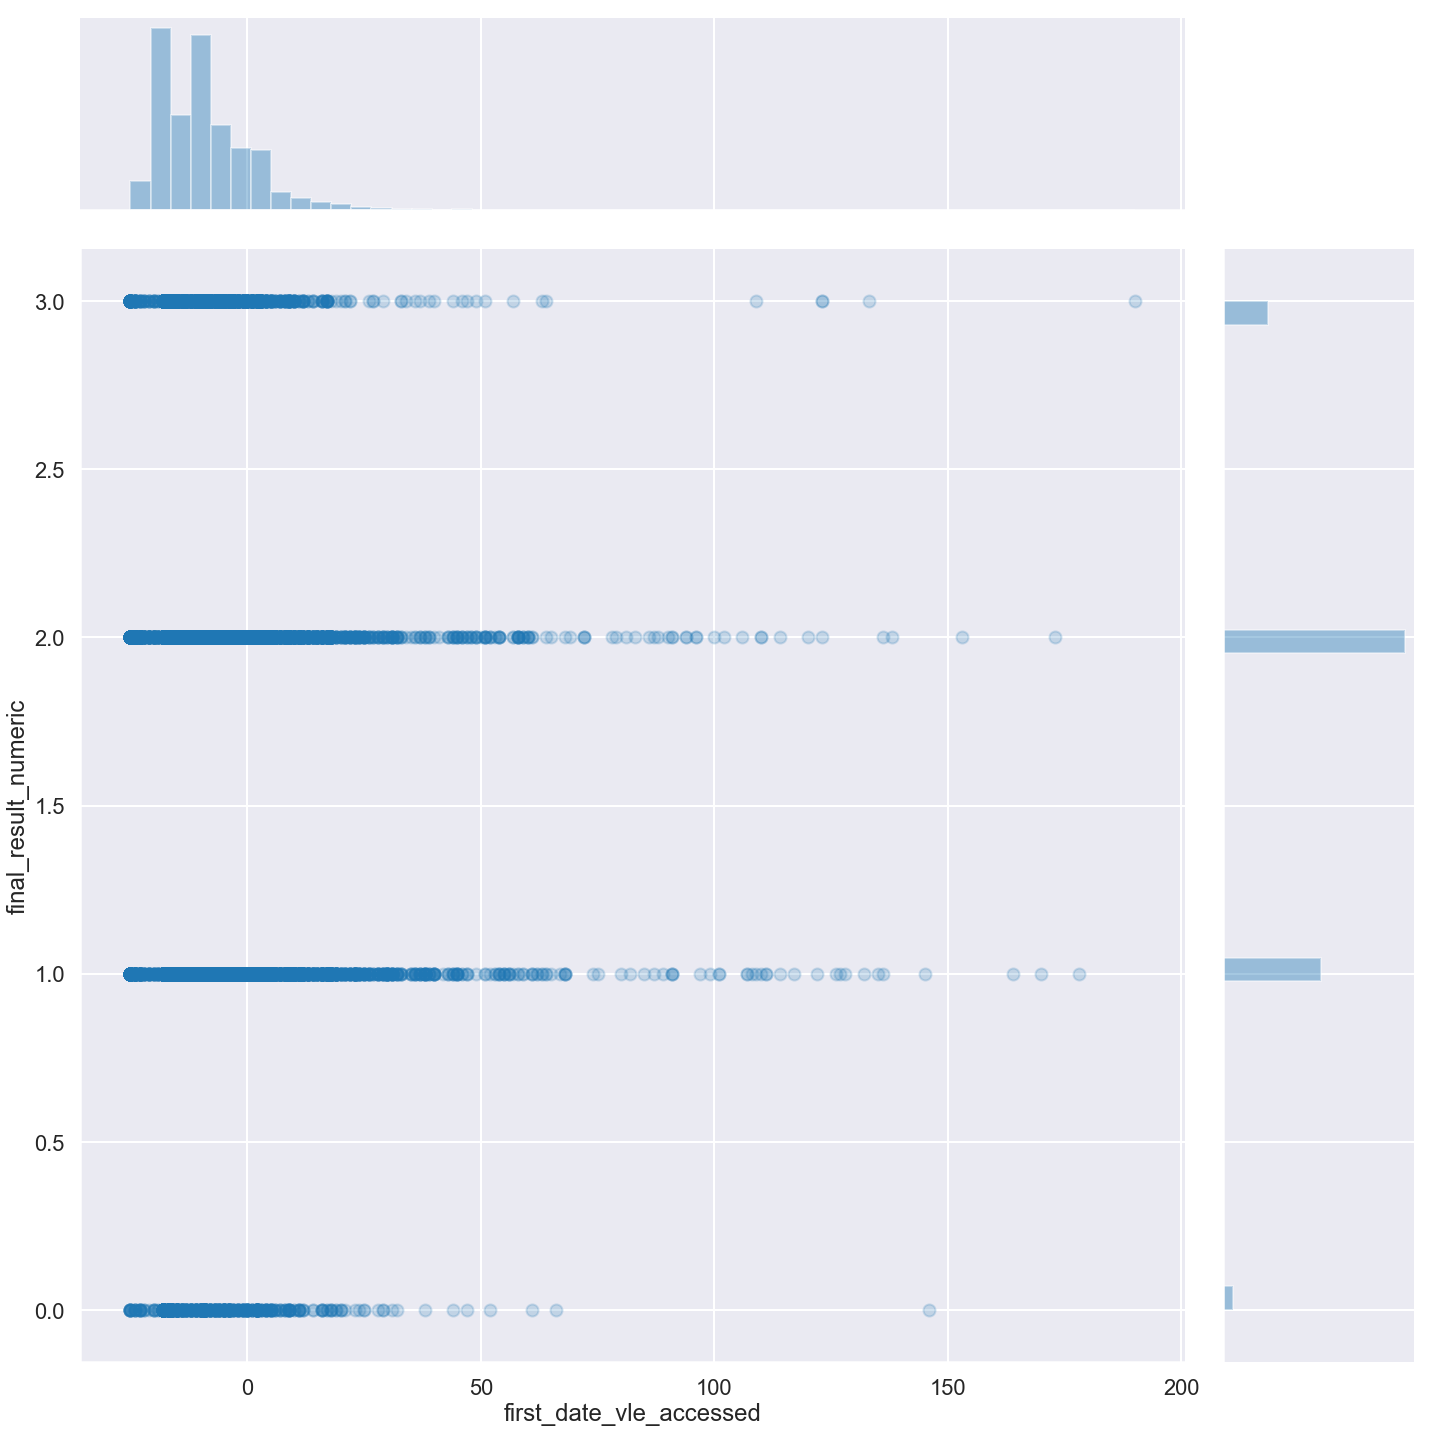

In [85]:
sns.jointplot(x='first_date_vle_accessed', y='final_result_numeric', data=df, size=20, alpha=0.2)

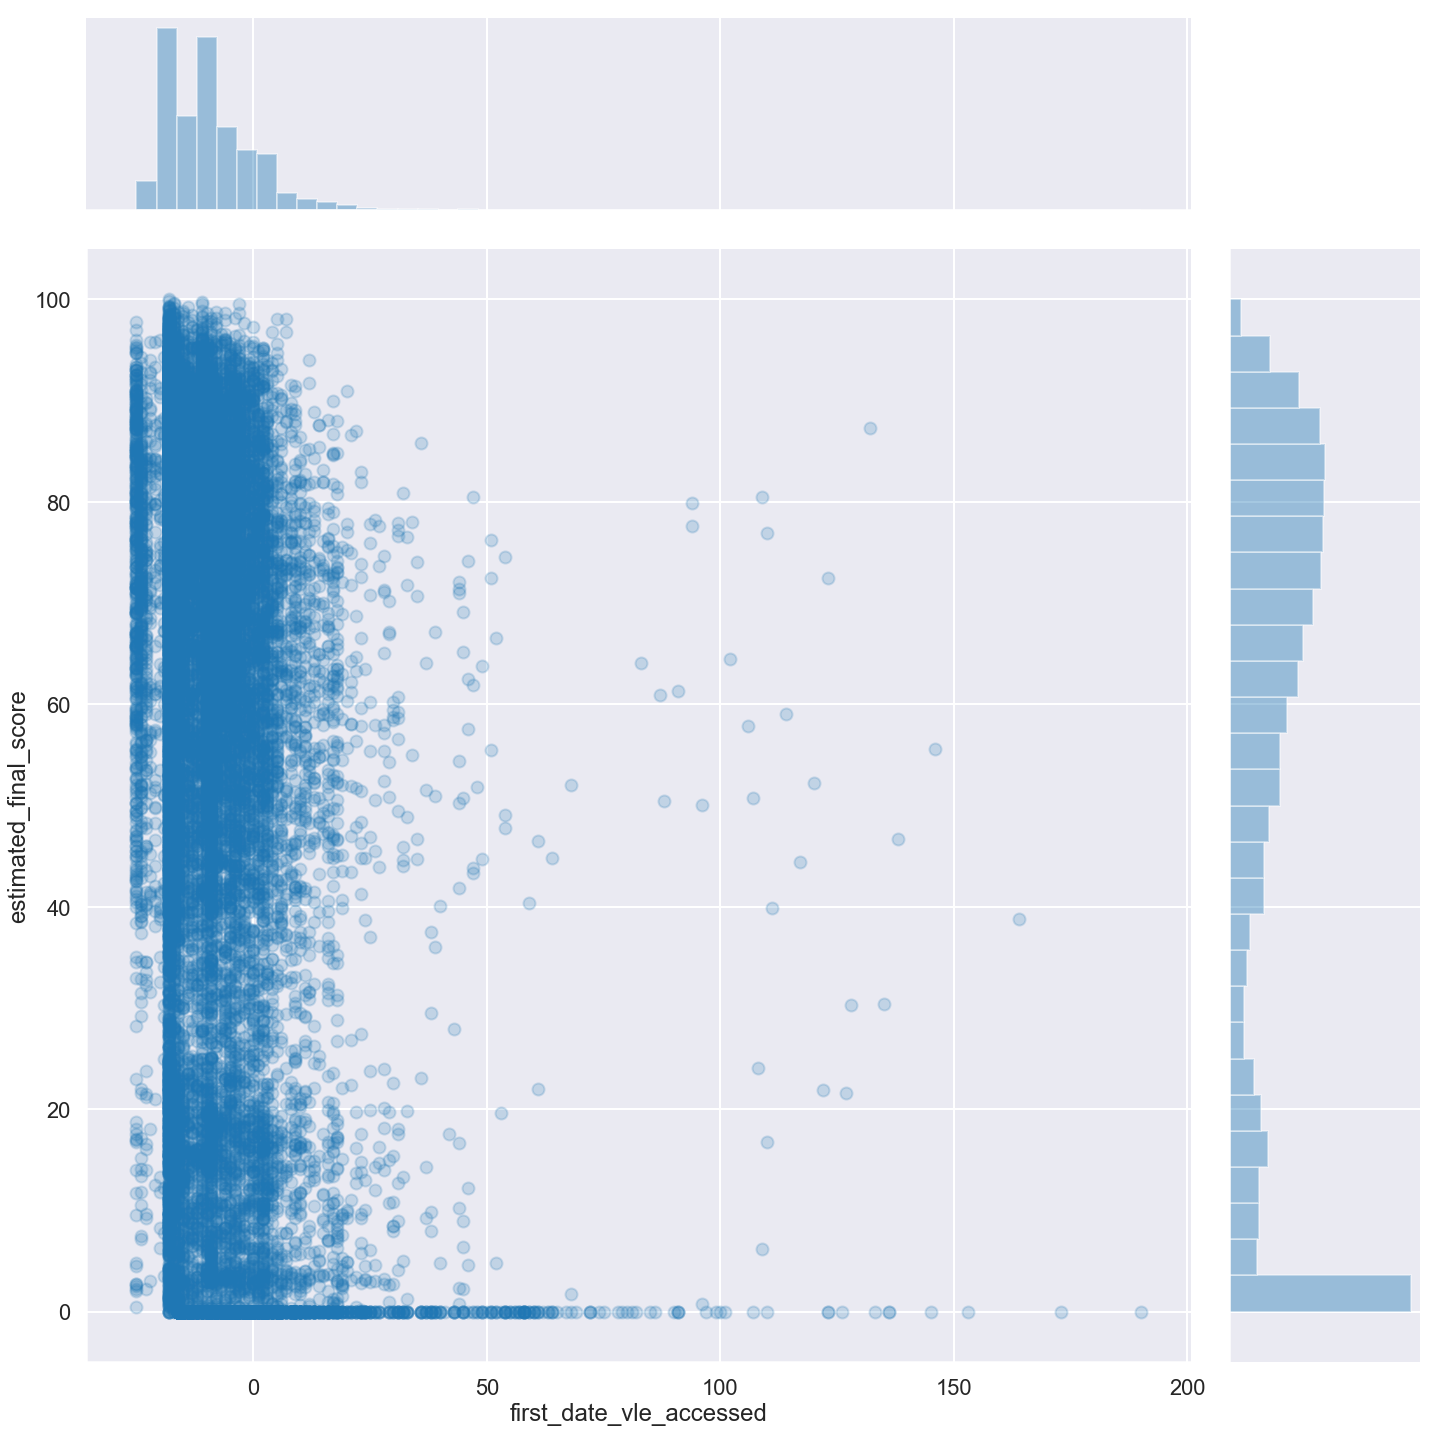

In [86]:
sns.jointplot(x='first_date_vle_accessed', y='estimated_final_score', data=df, size=20, alpha=0.2)

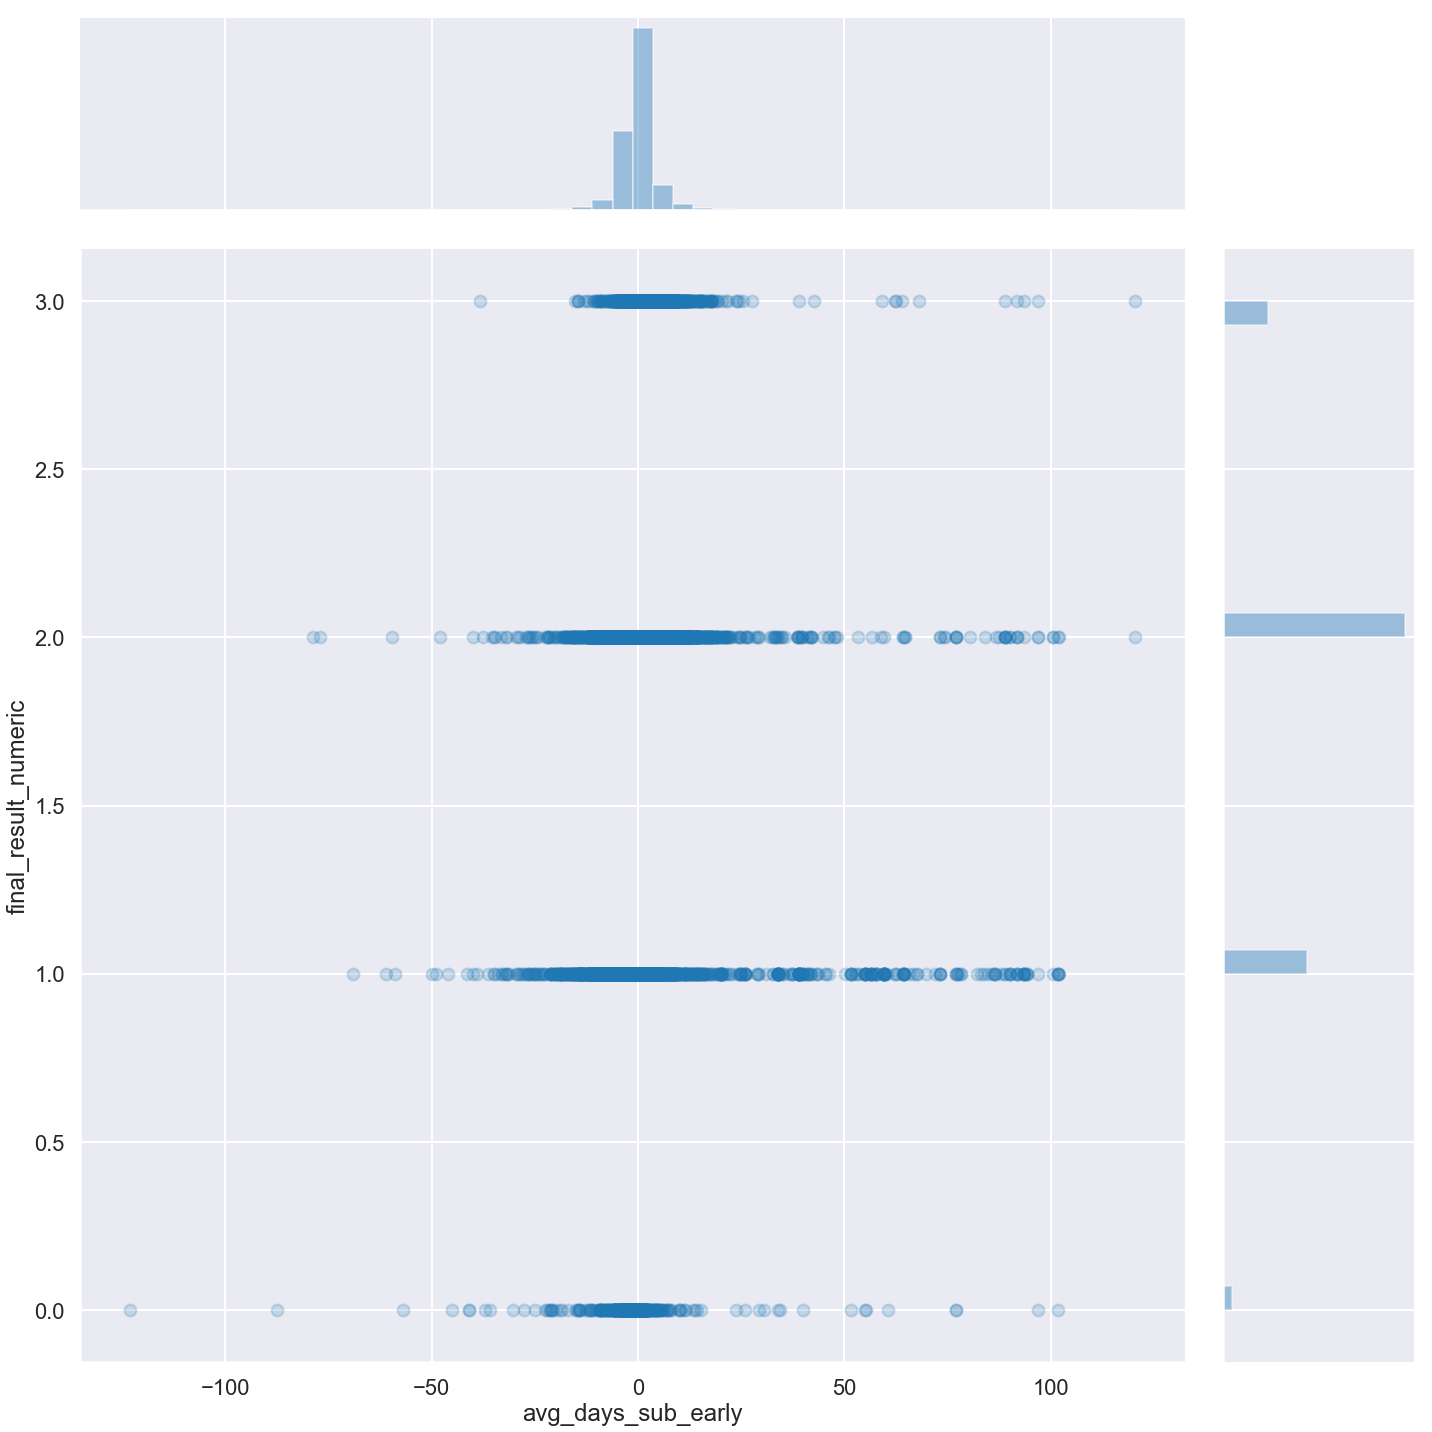

In [87]:
sns.jointplot(x='avg_days_sub_early', y='final_result_numeric', data=df, size=20, alpha=0.2)

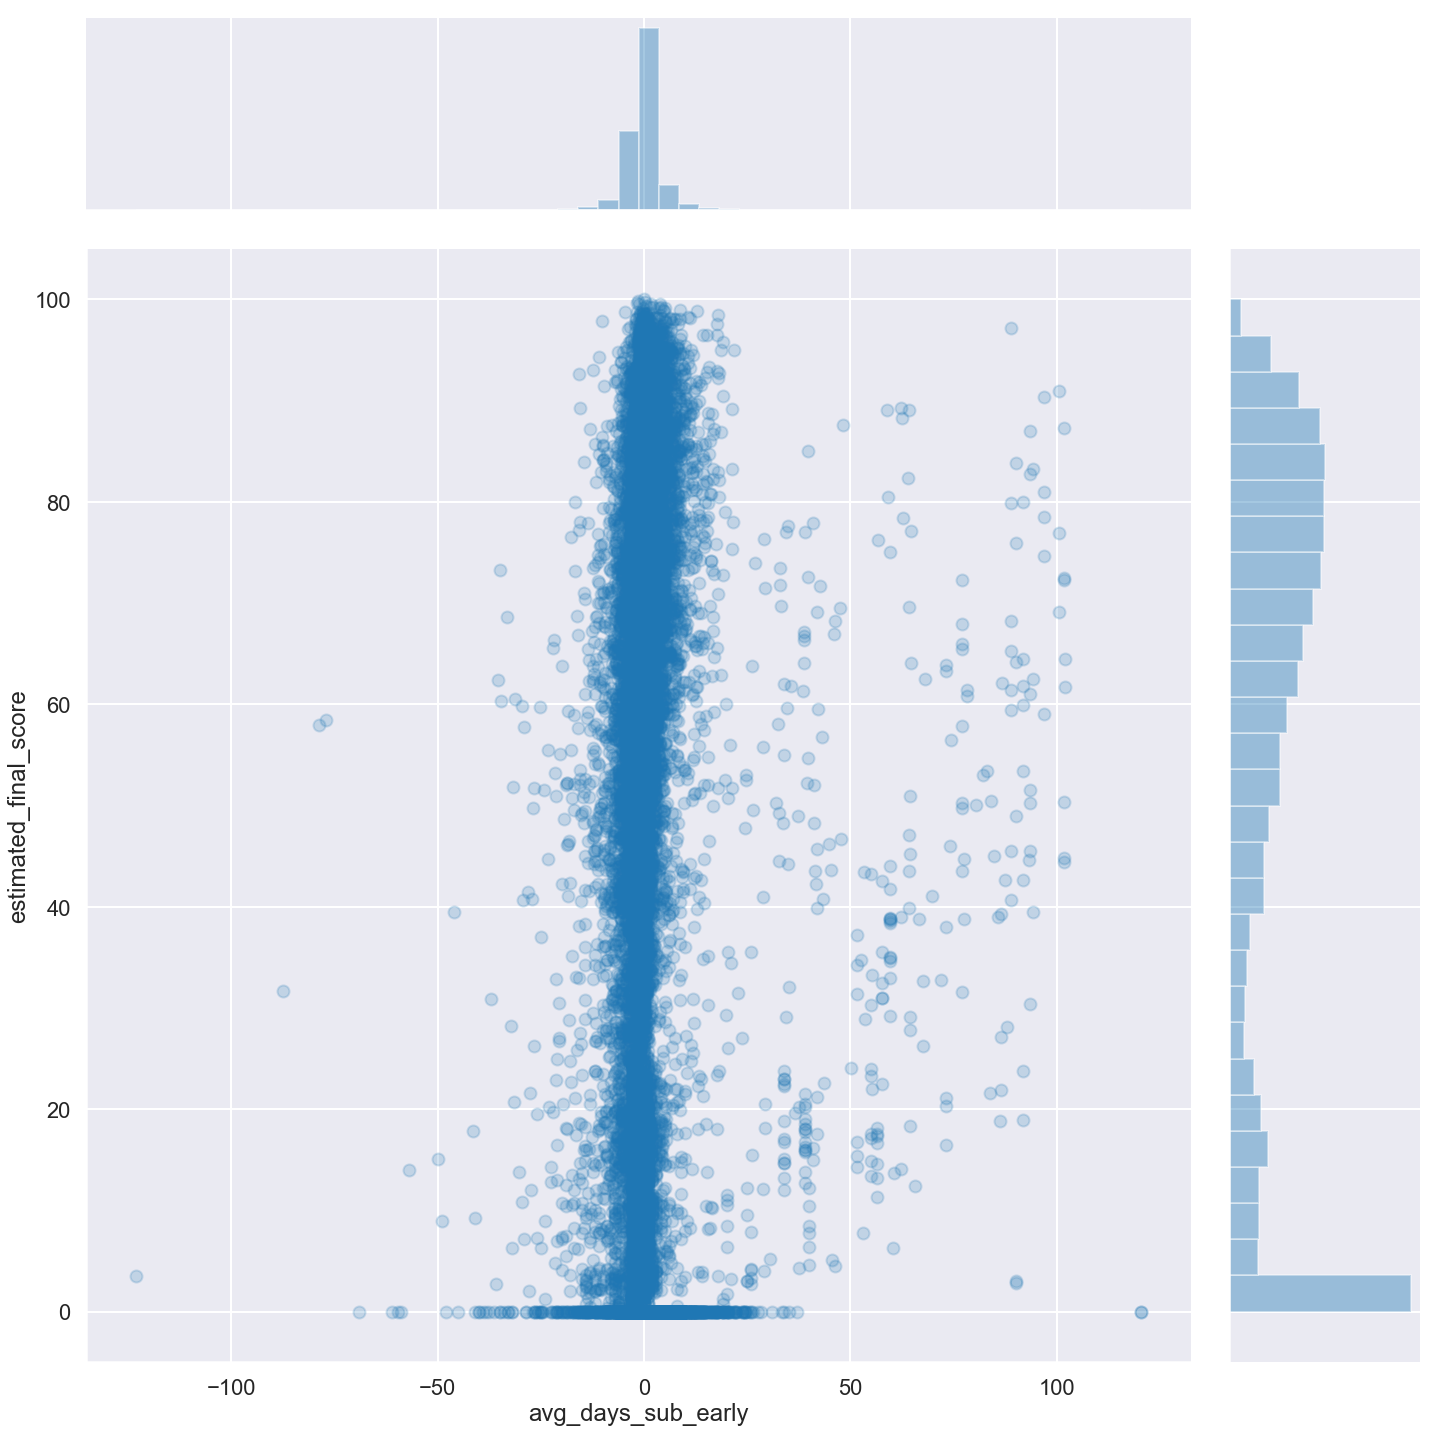

In [88]:
sns.jointplot(x='avg_days_sub_early', y='estimated_final_score', data=df, size=20, alpha=0.2)

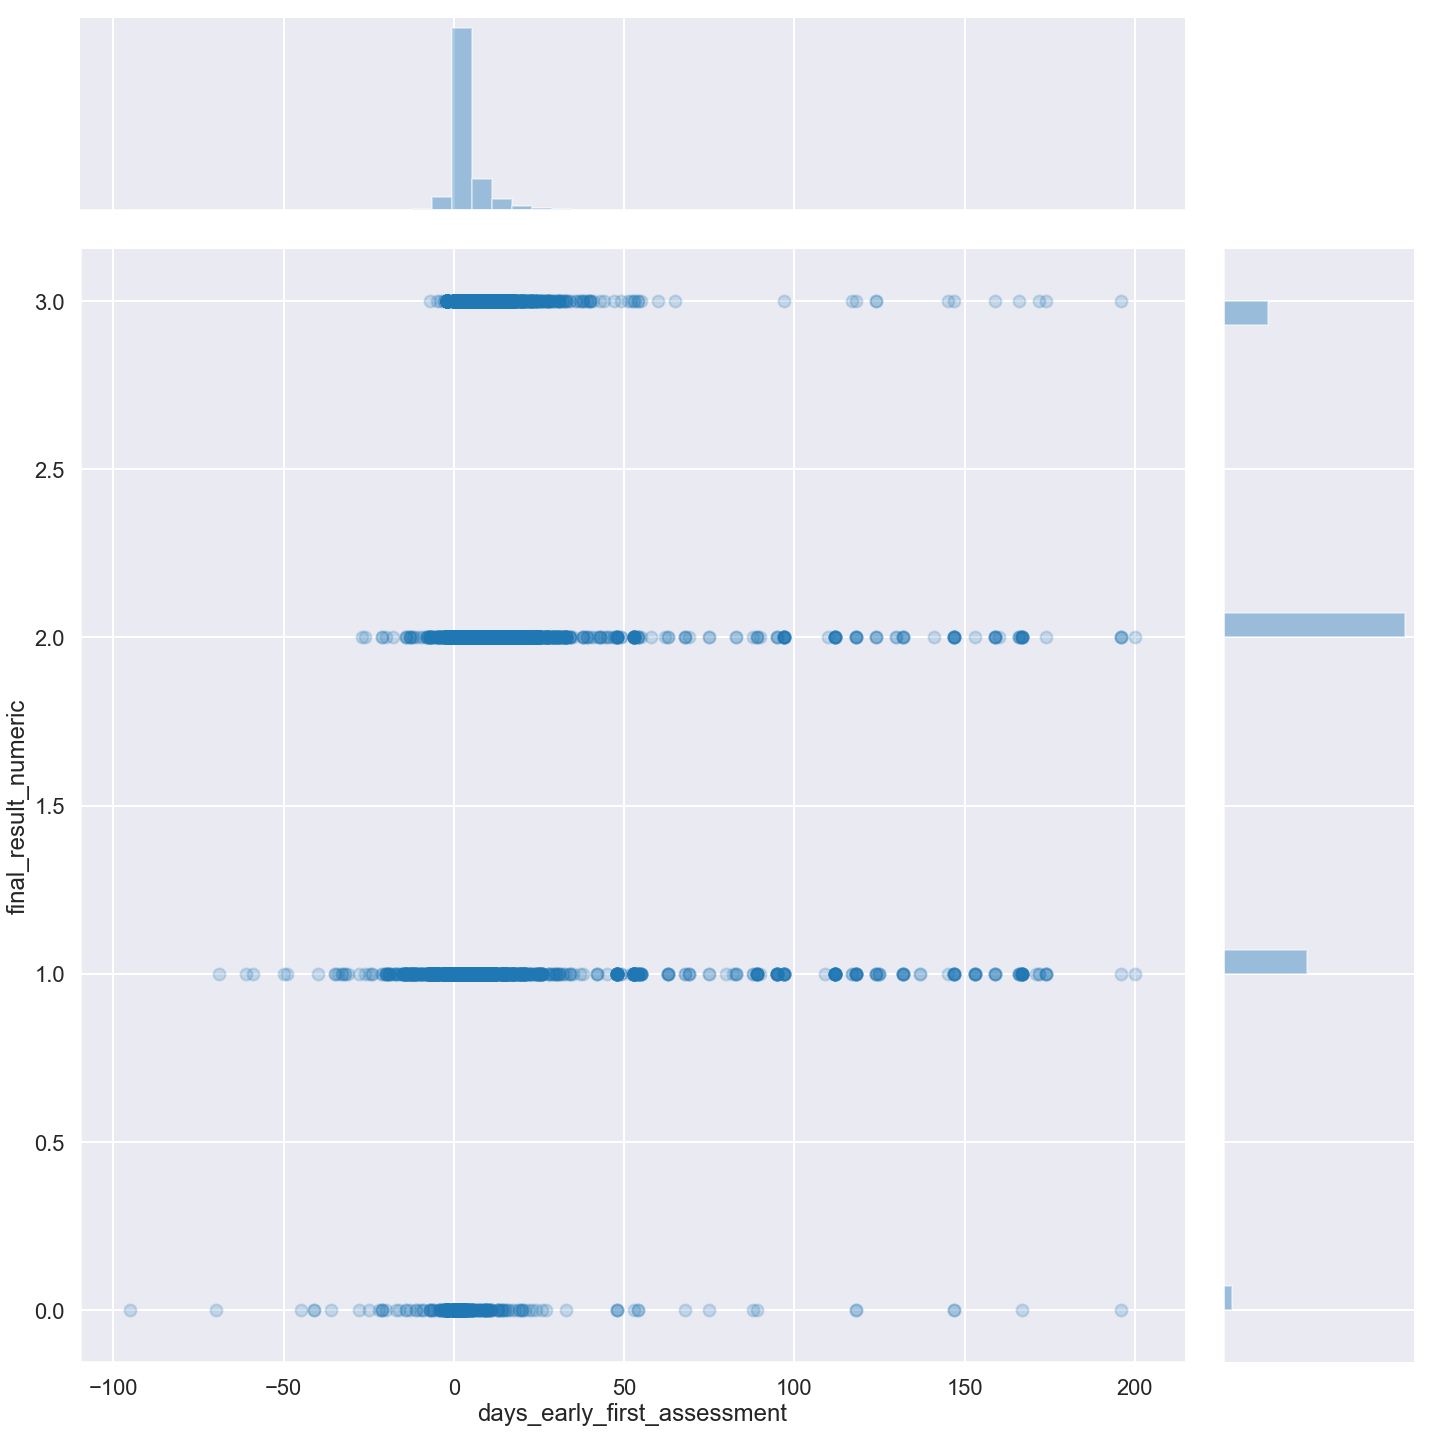

In [89]:
sns.jointplot(x='days_early_first_assessment', y='final_result_numeric', data=df, size=20, alpha=0.2)

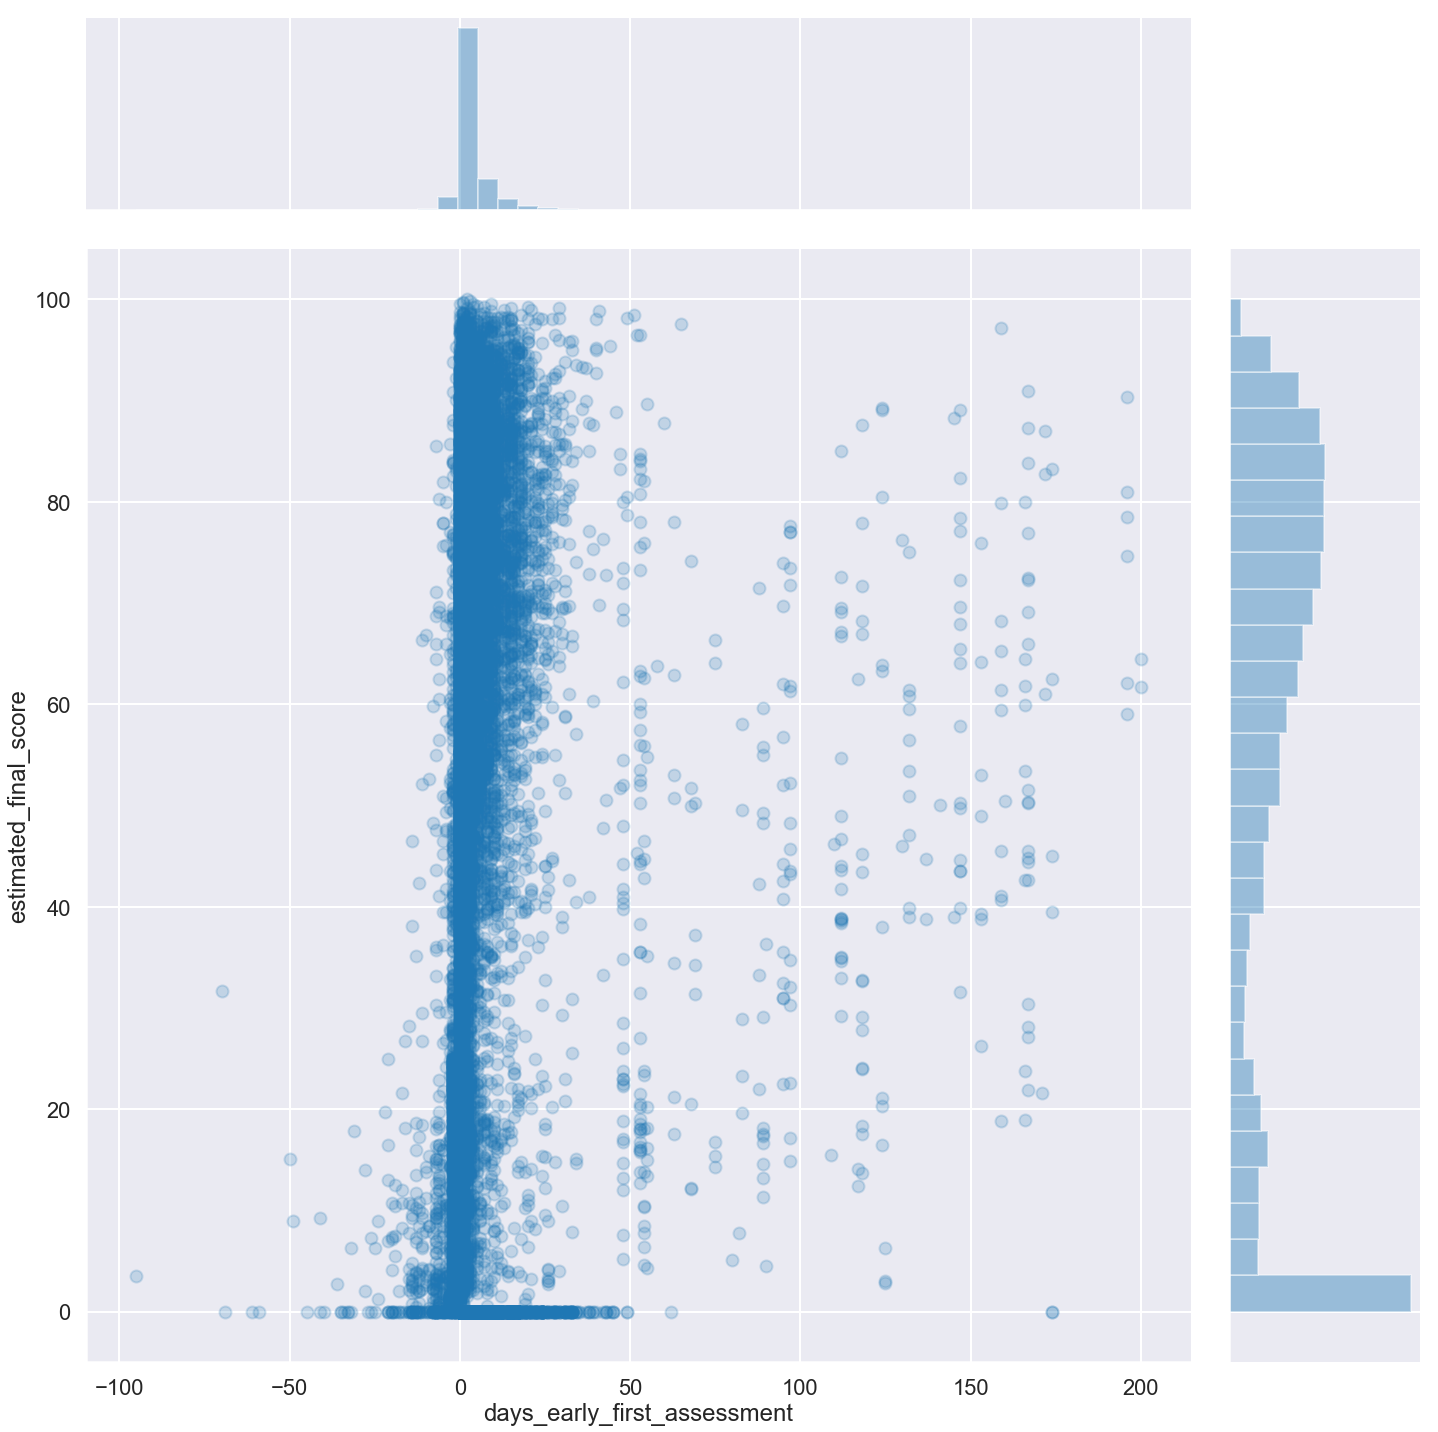

In [90]:
sns.jointplot(x='days_early_first_assessment', y='estimated_final_score', data=df, size=20, alpha=0.2)

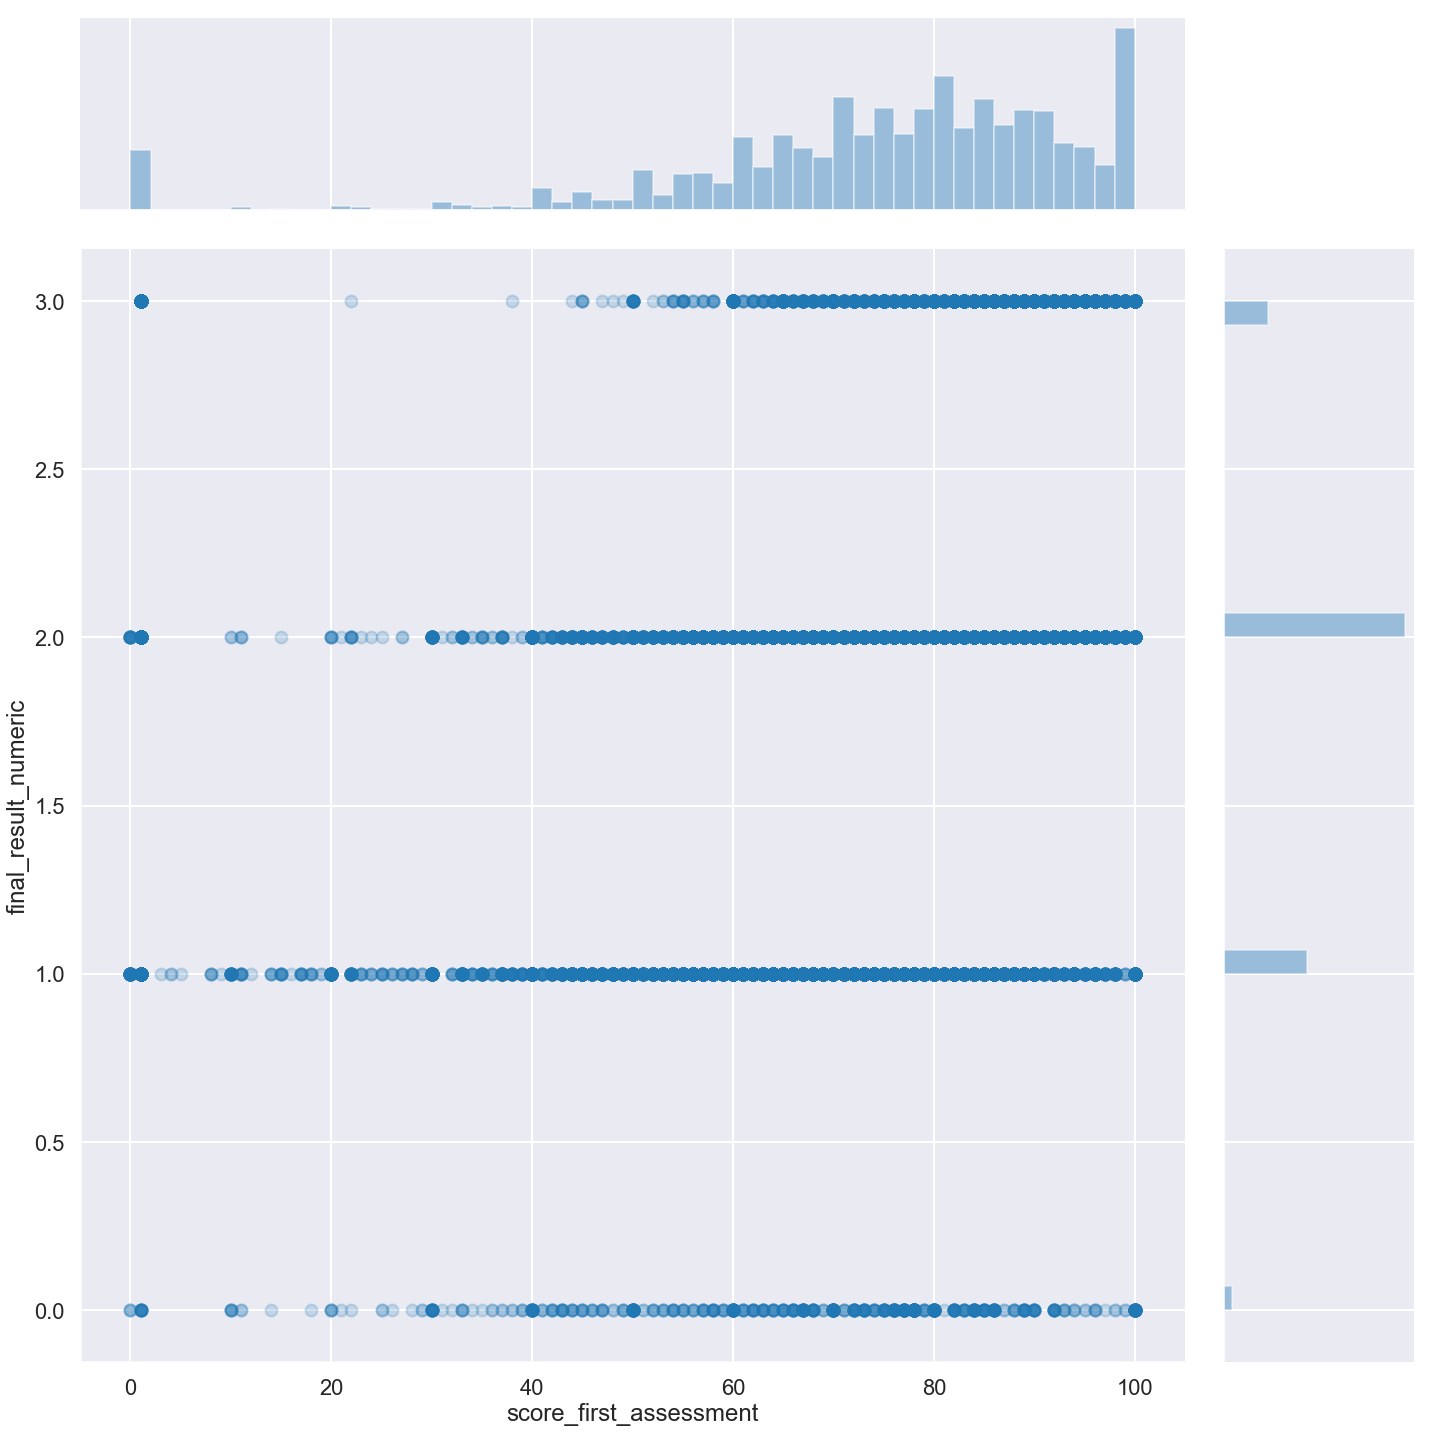

In [91]:
sns.jointplot(x='score_first_assessment', y='final_result_numeric', data=df, size=20, alpha=0.2)

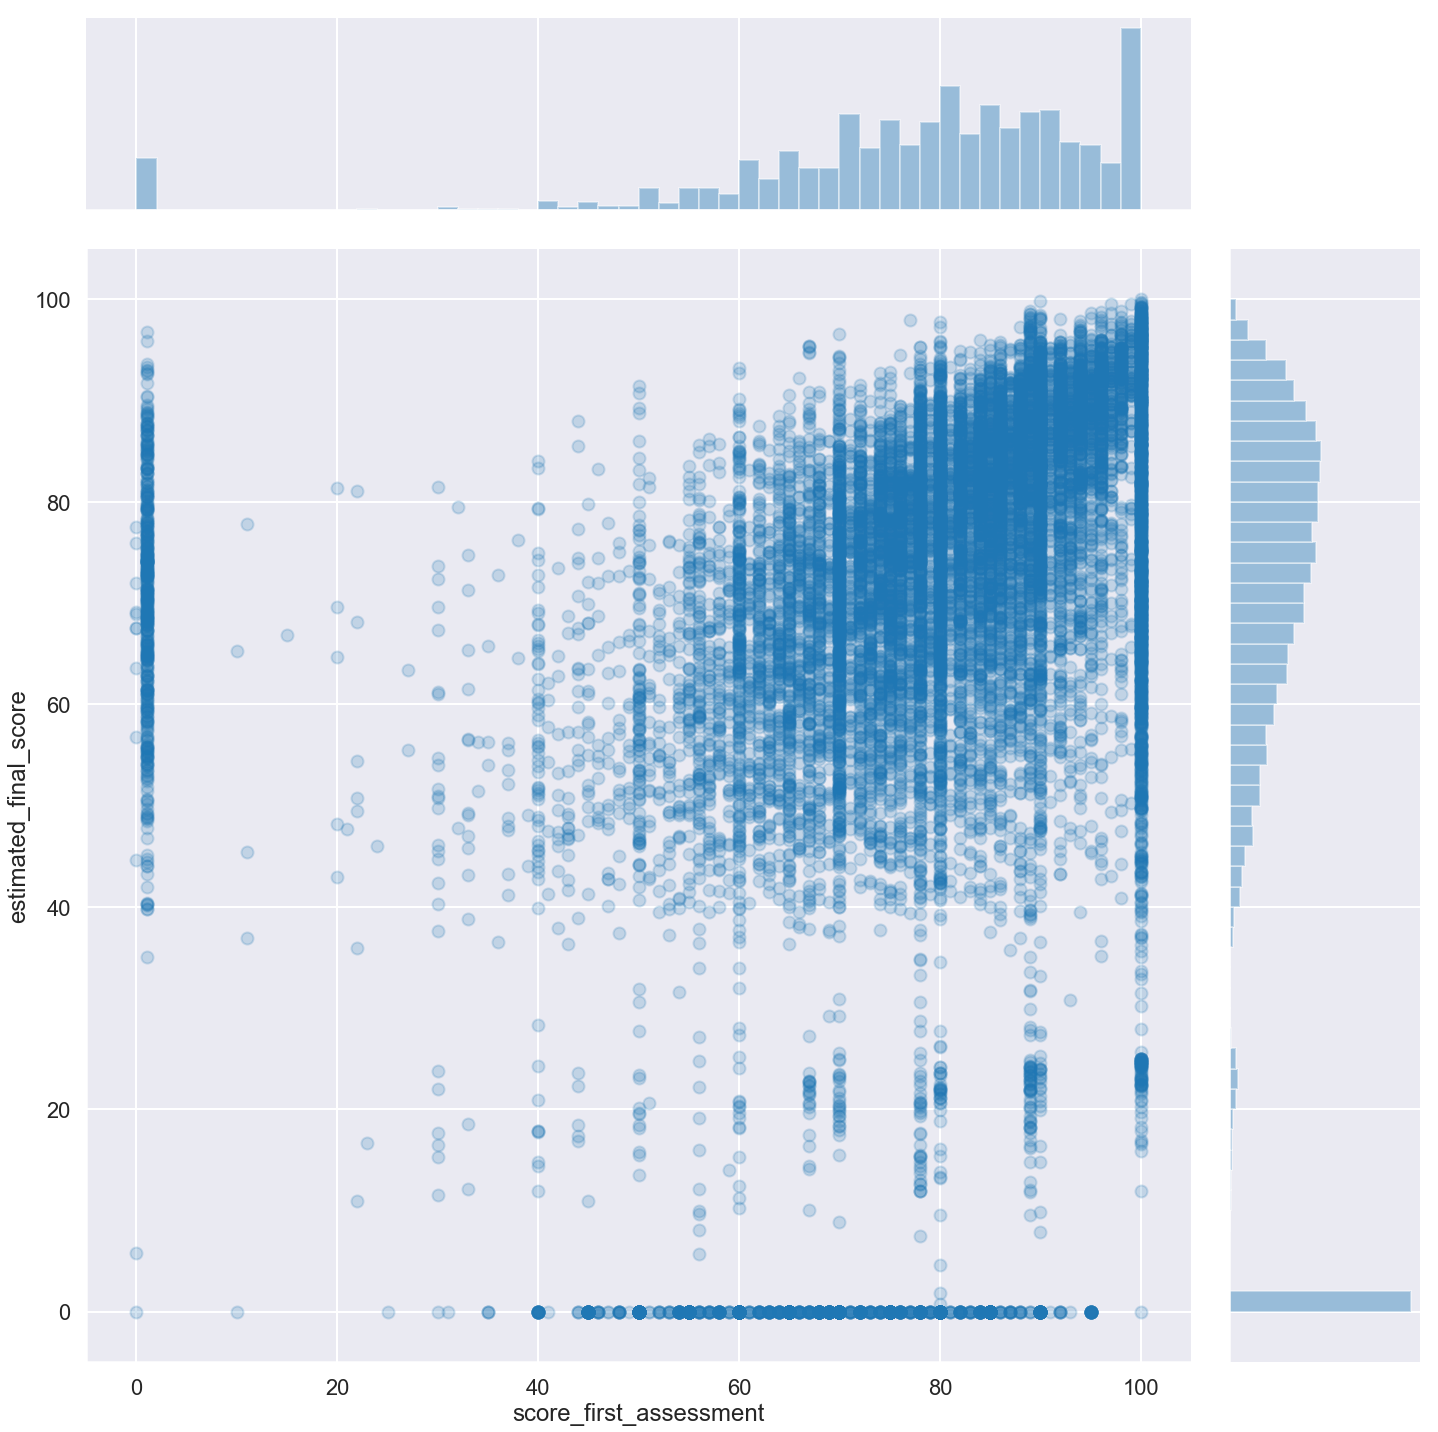

In [161]:
sns.jointplot(x='score_first_assessment', y='estimated_final_score', data=finished, size=20, alpha=0.2)

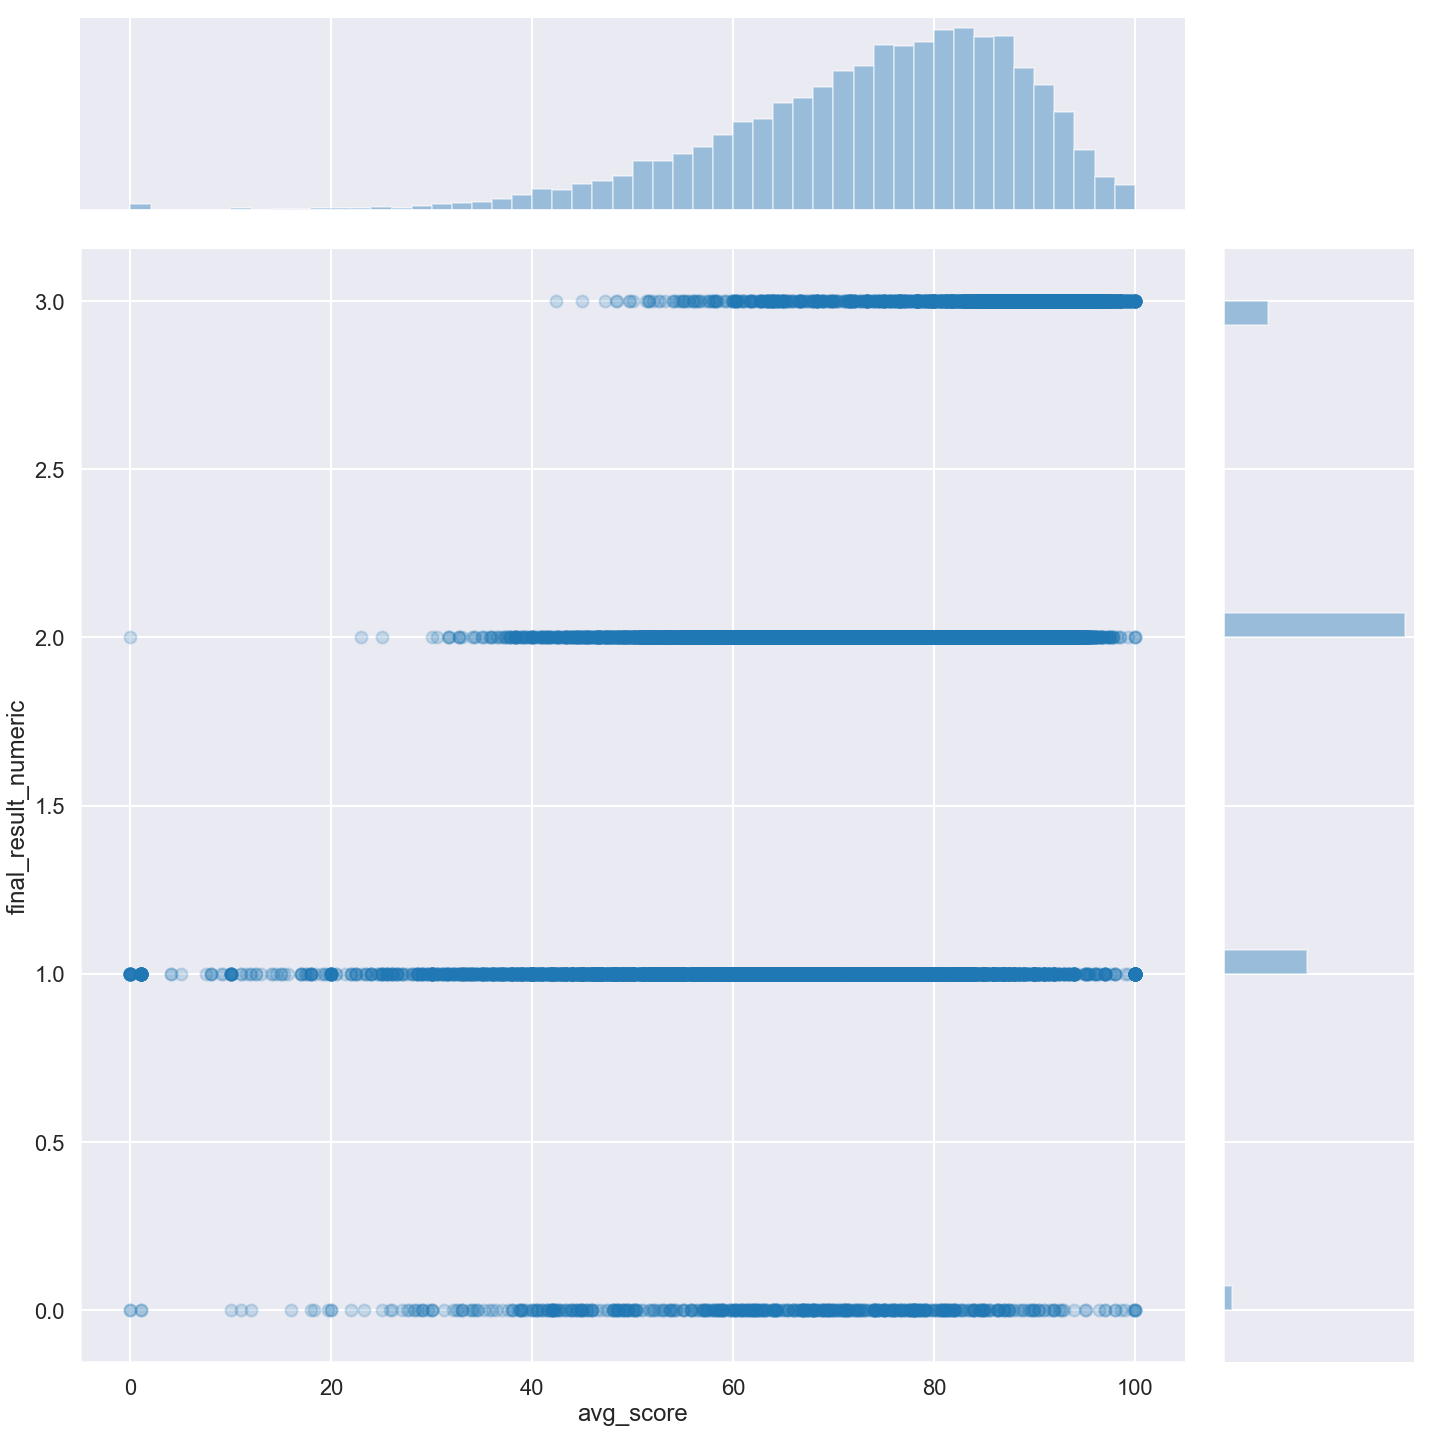

In [93]:
sns.jointplot(x='avg_score', y='final_result_numeric', data=df, size=20, alpha=0.2)

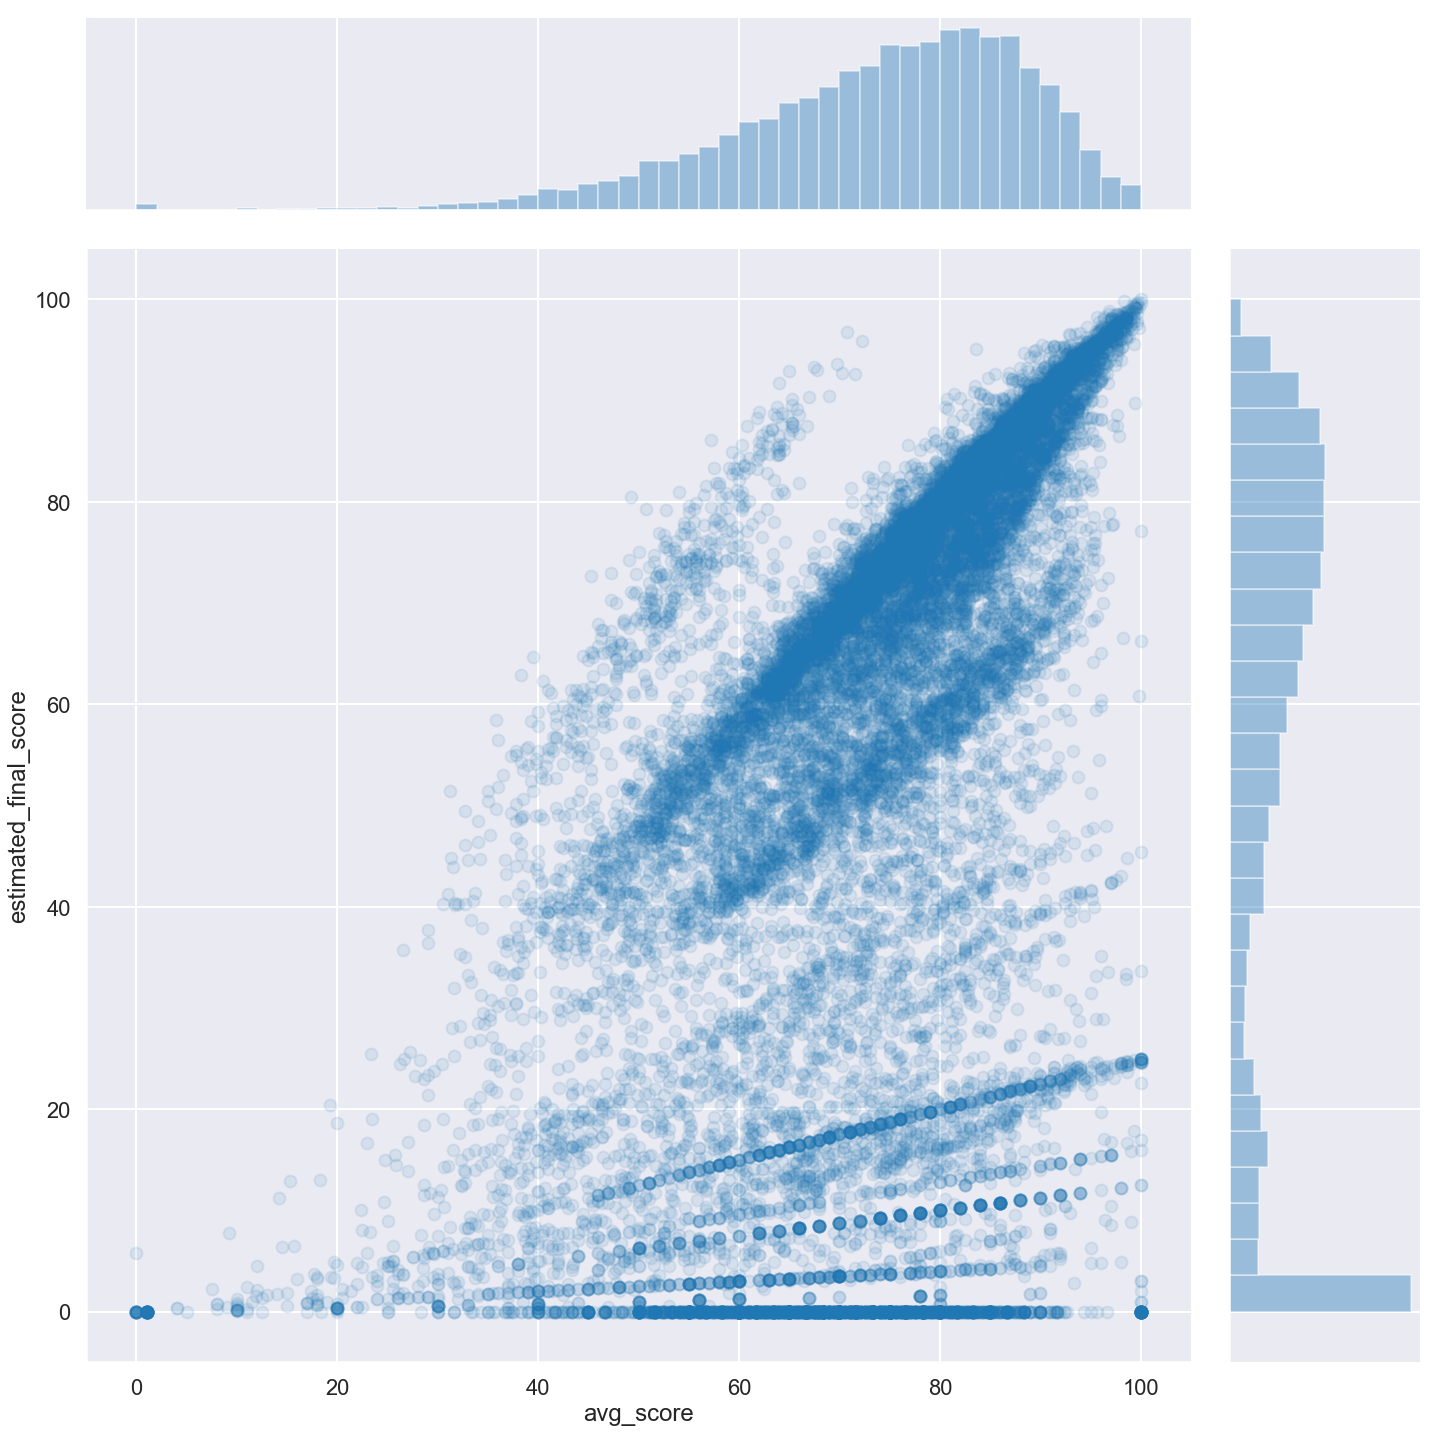

In [94]:
sns.jointplot(x='avg_score', y='estimated_final_score', data=df, size=20, alpha=0.1)

### Univariate Plots of Engineered Features

In [99]:
df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'date_registration',
       'date_unregistration', 'module_presentation_length',
       'module_not_completed', 'sum_click_dataplus', 'sum_click_dualpane',
       'sum_click_externalquiz', 'sum_click_folder', 'sum_click_forumng',
       'sum_click_glossary', 'sum_click_homepage', 'sum_click_htmlactivity',
       'sum_click_oucollaborate', 'sum_click_oucontent',
       'sum_click_ouelluminate', 'sum_click_ouwiki', 'sum_click_page',
       'sum_click_questionnaire', 'sum_click_quiz', 'sum_click_repeatactivity',
       'sum_click_resource', 'sum_click_sharedsubpage', 'sum_click_subpage',
       'sum_click_url', 'sum_days_vle_accessed', 'max_clicks_one_day',
       'first_date_vle_accessed', 'estimated_final_score', 'avg_score',
       'avg_days_sub_early', 'days_early_first_assessmen

In [183]:
df['date_unregistration'].unique()

array([nan])

In [178]:
i = list(range(16, 45))
f = list(df.columns[i])
# for n in [8,9,12]:
#     f.append(n)

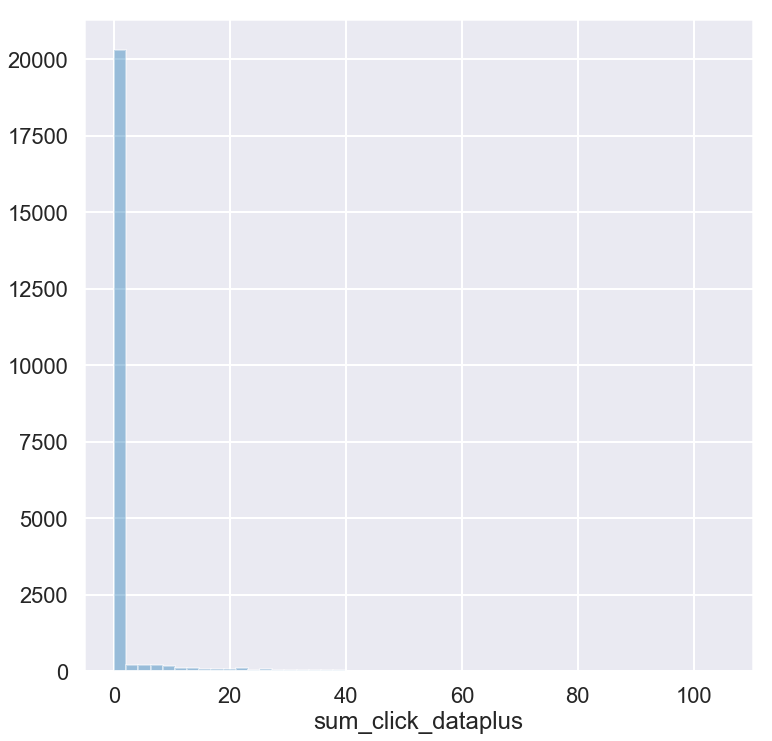

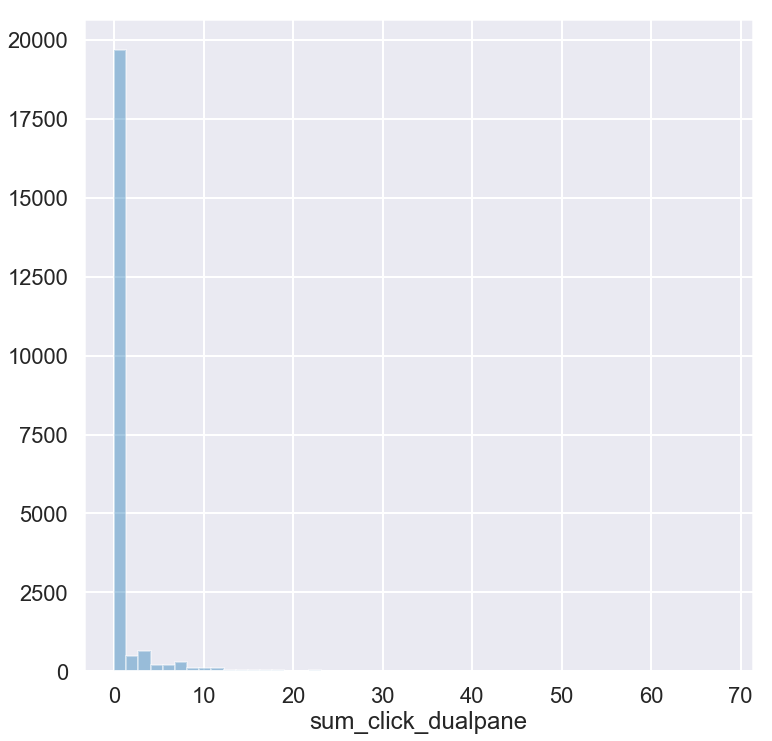

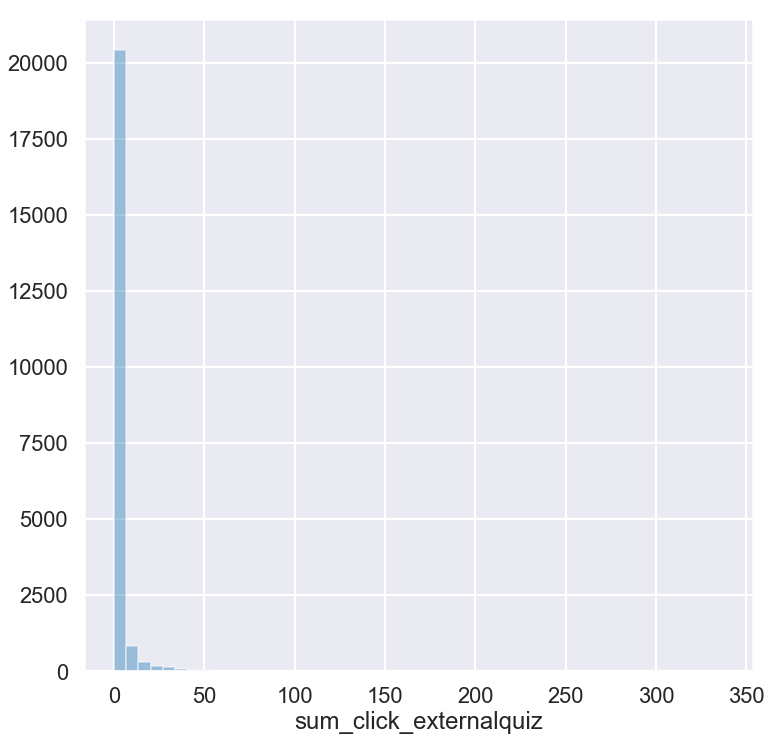

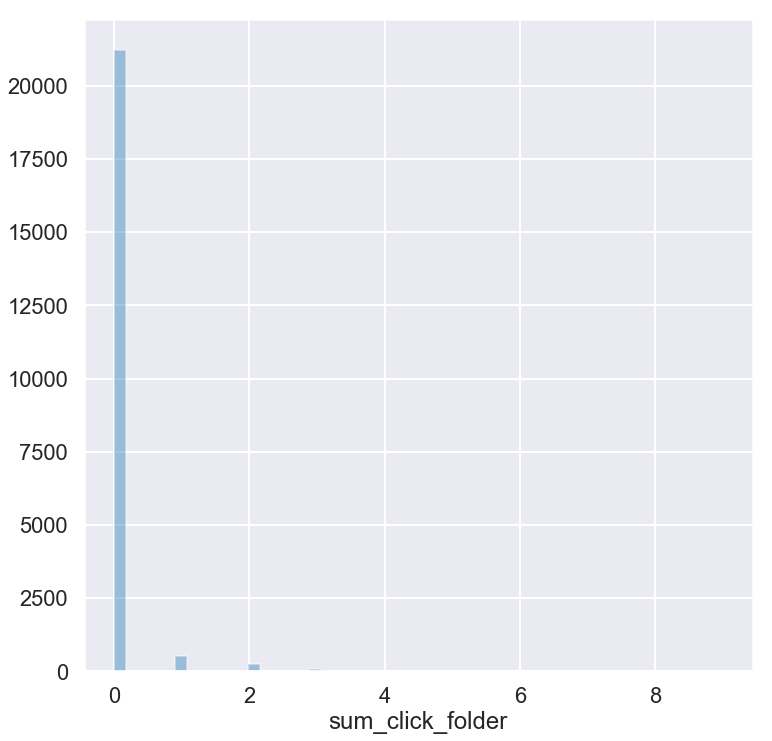

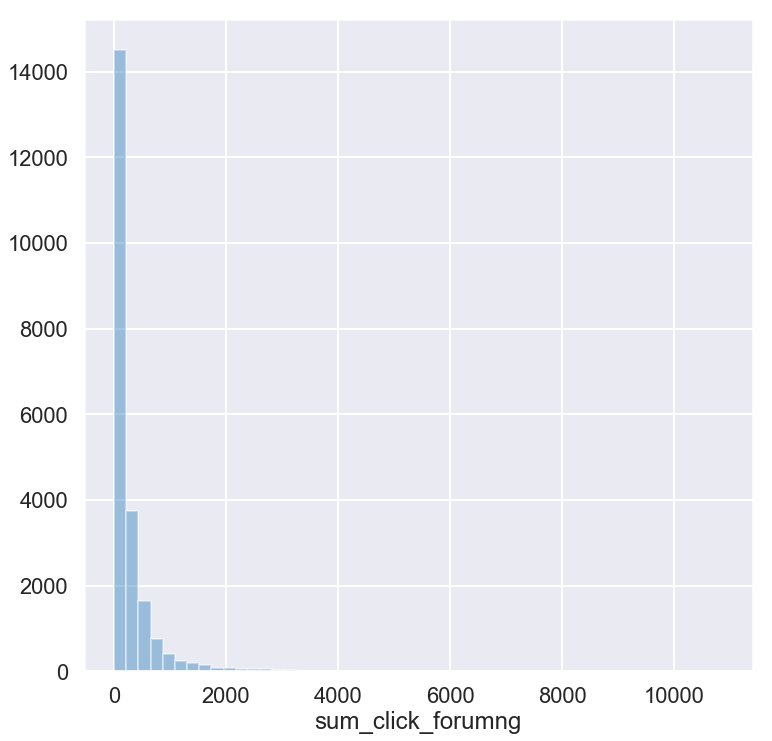

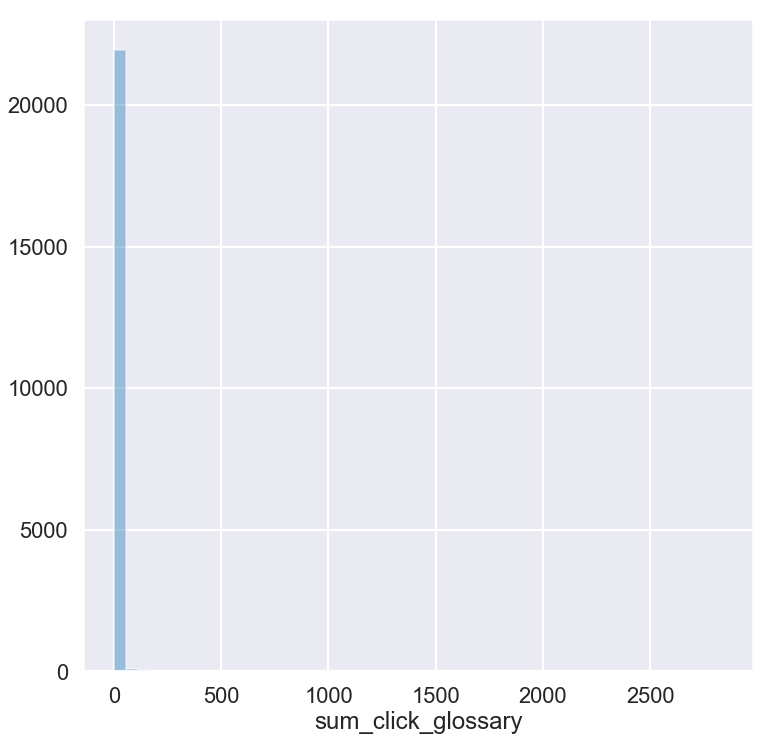

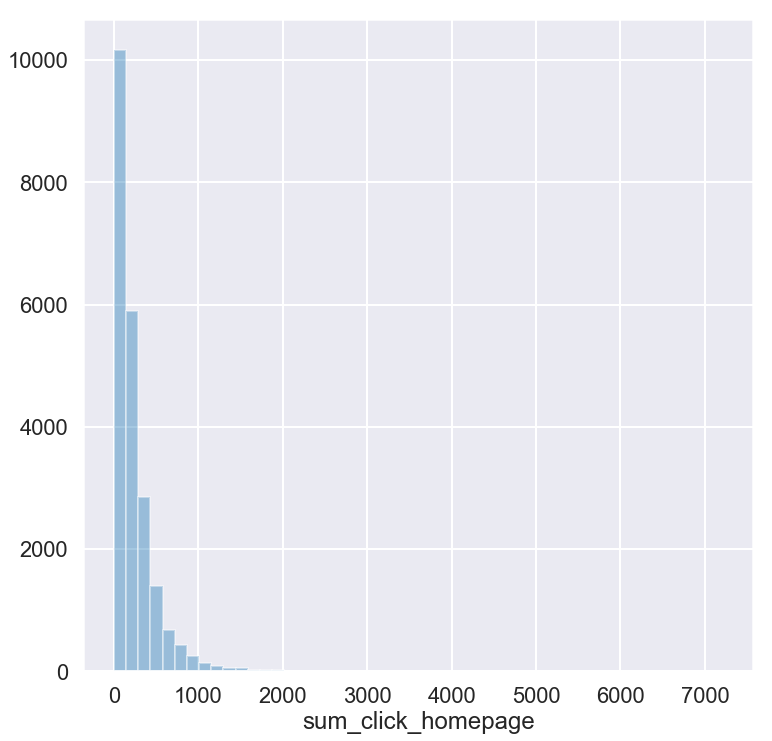

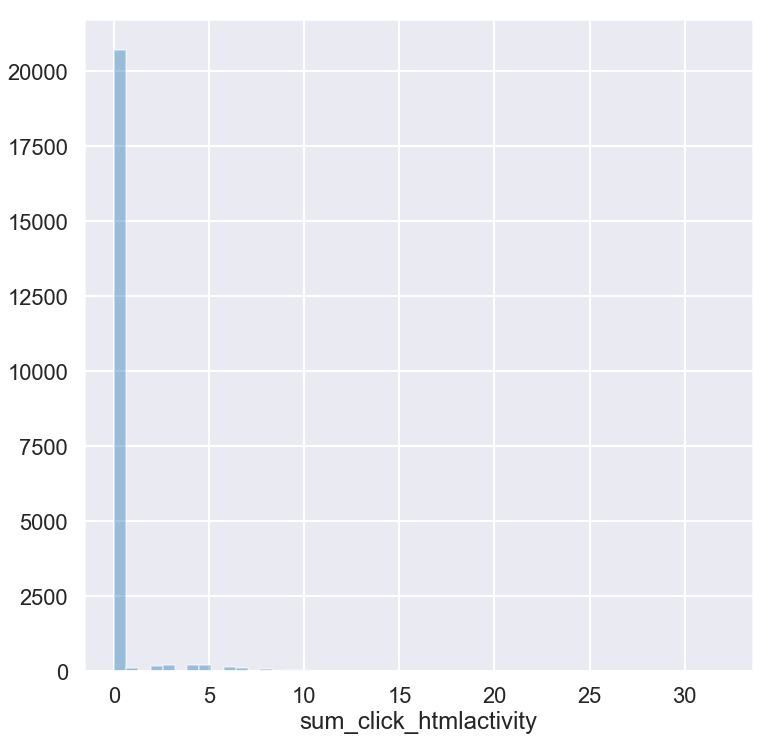

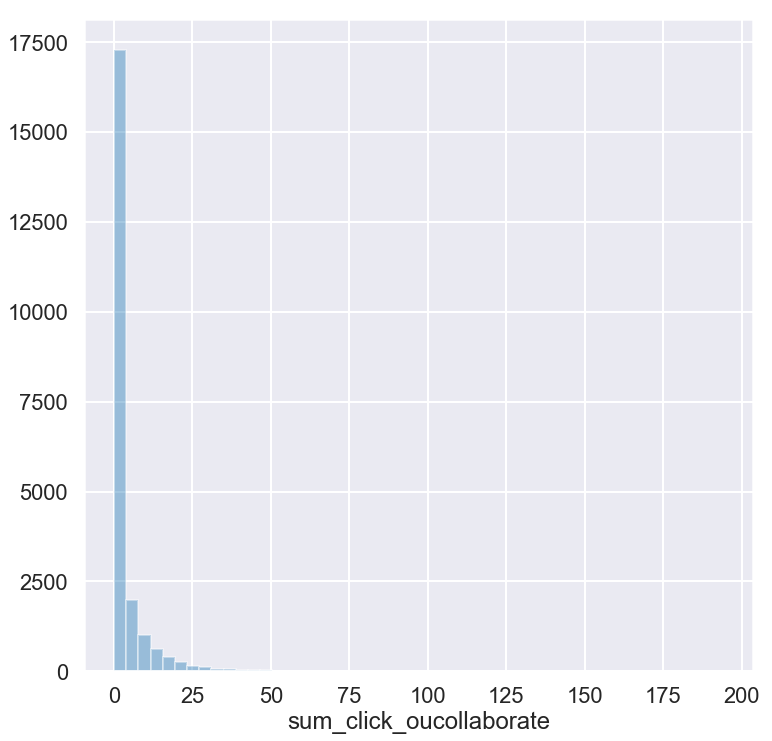

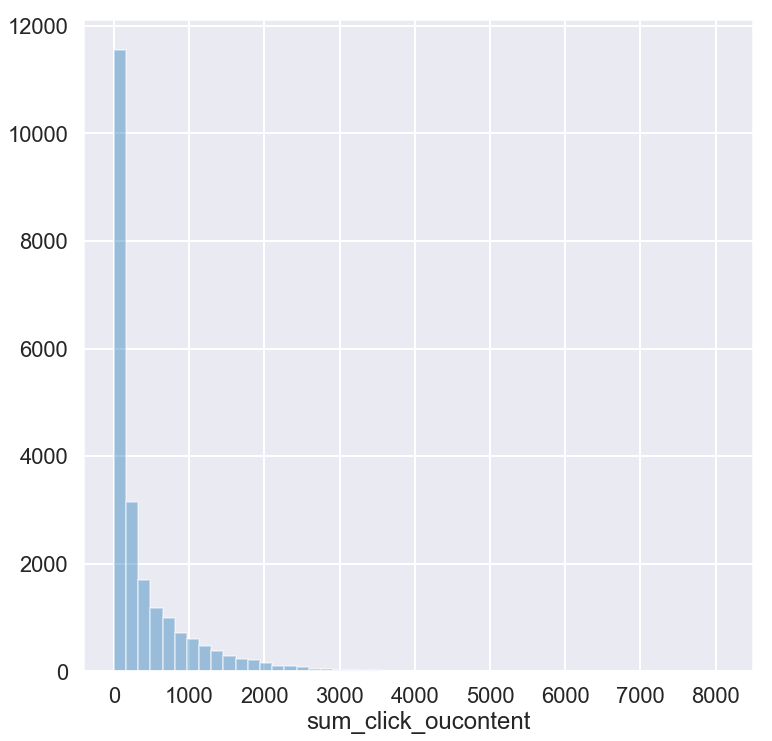

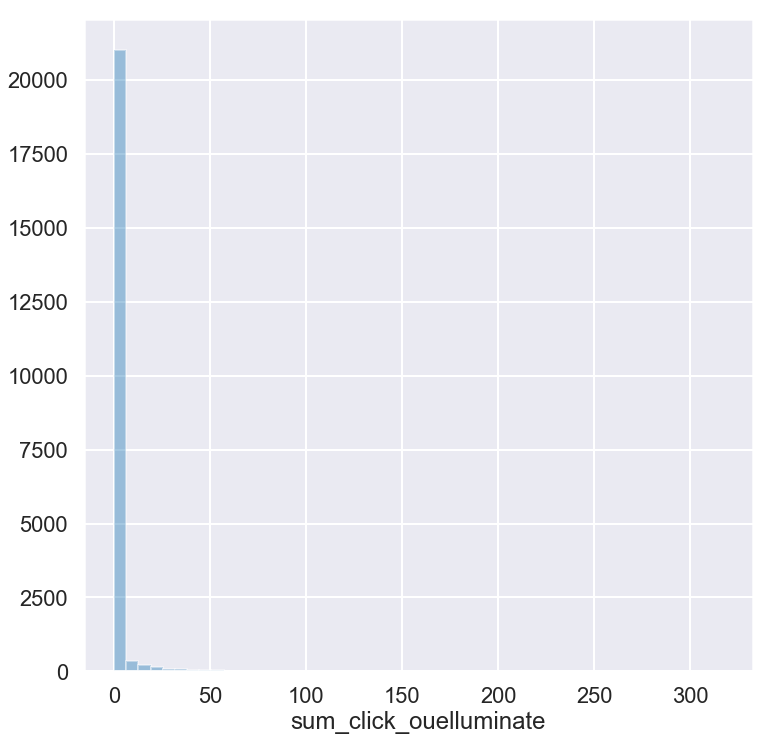

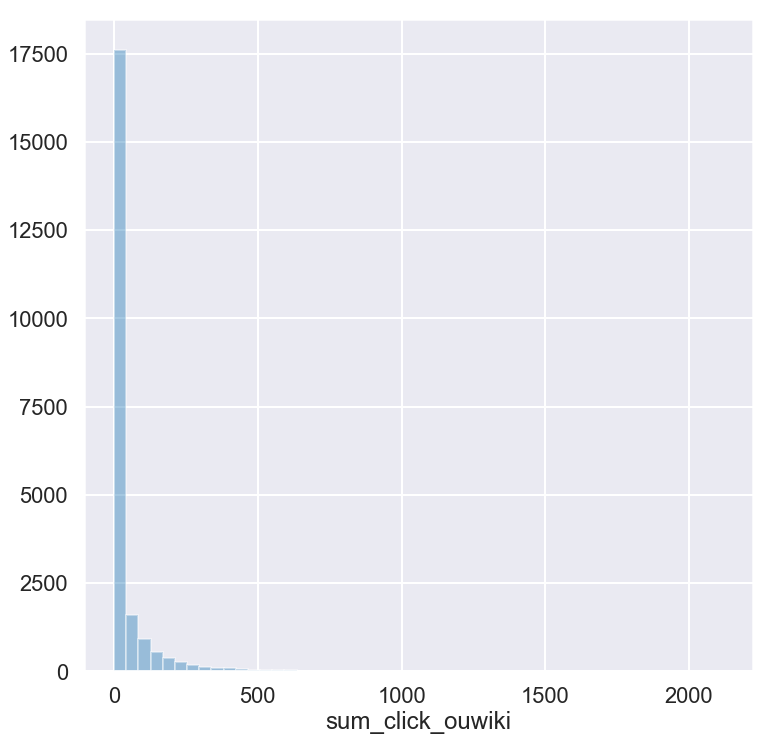

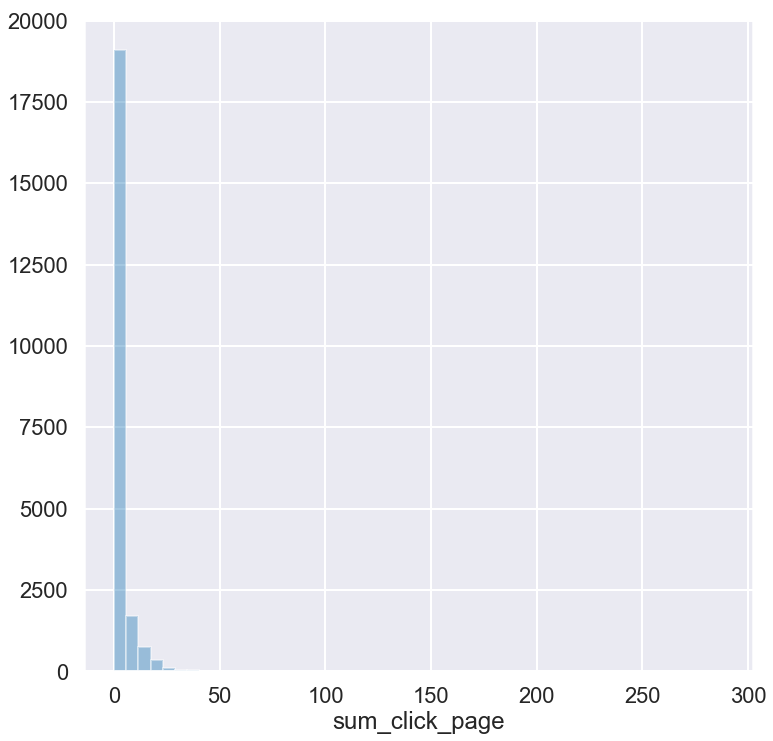

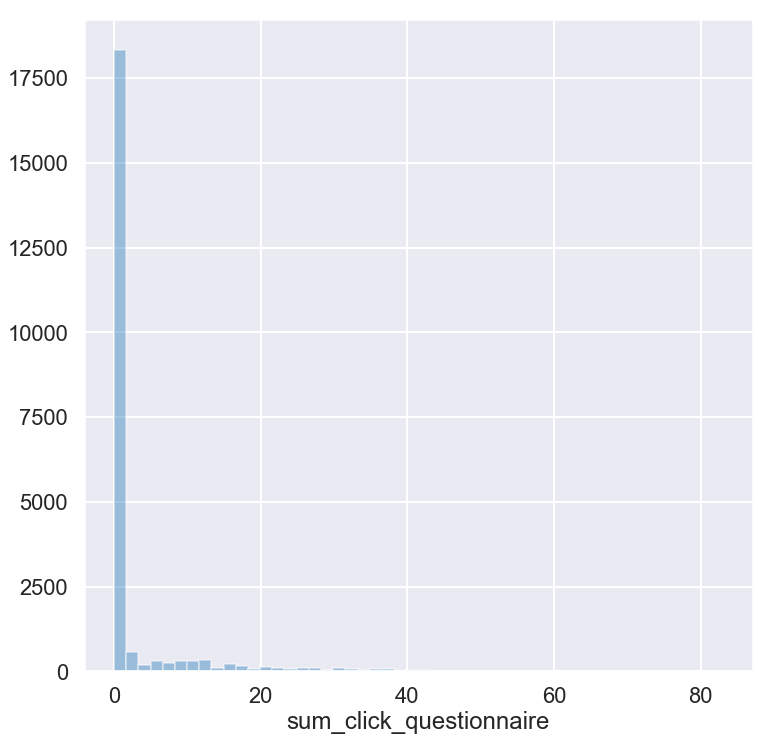

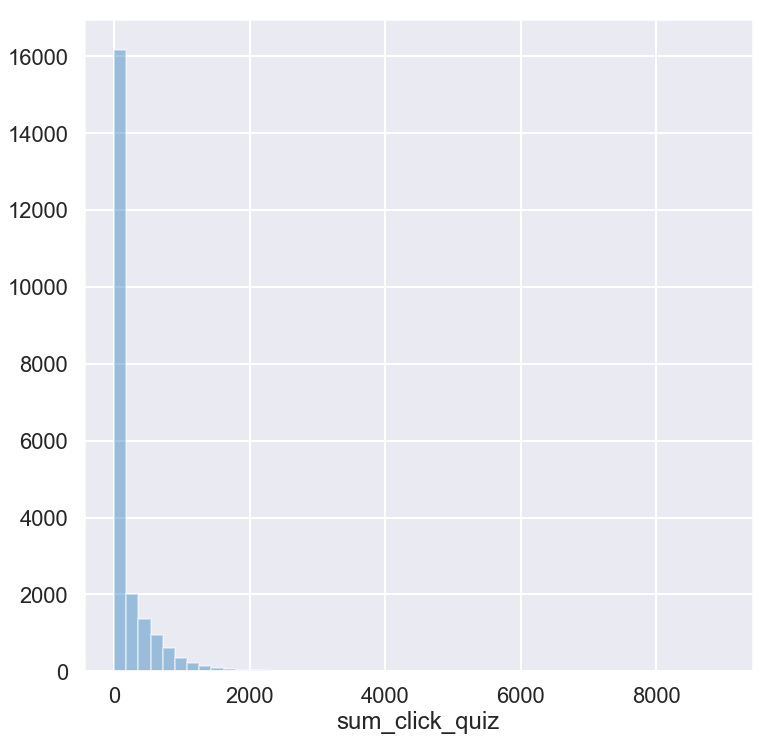

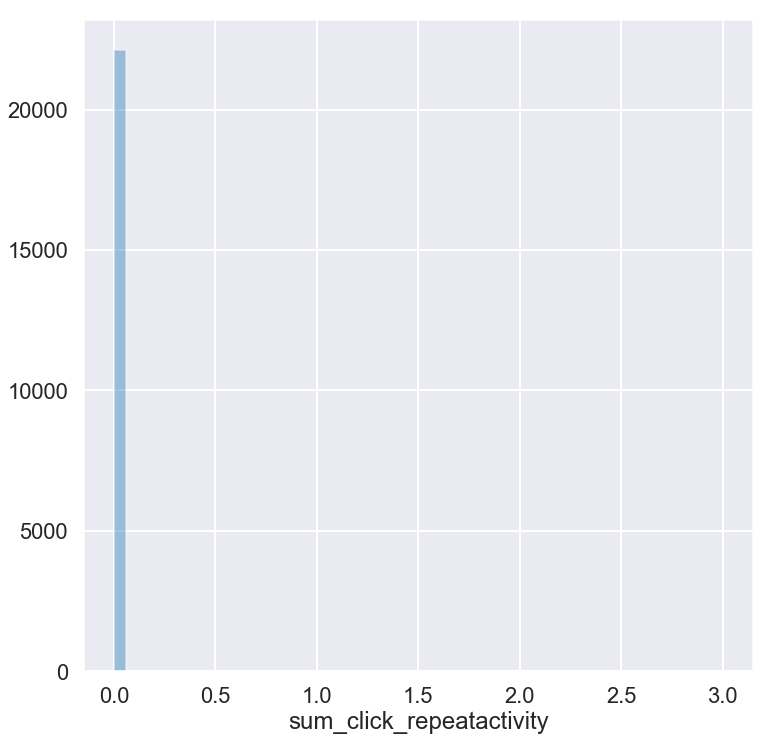

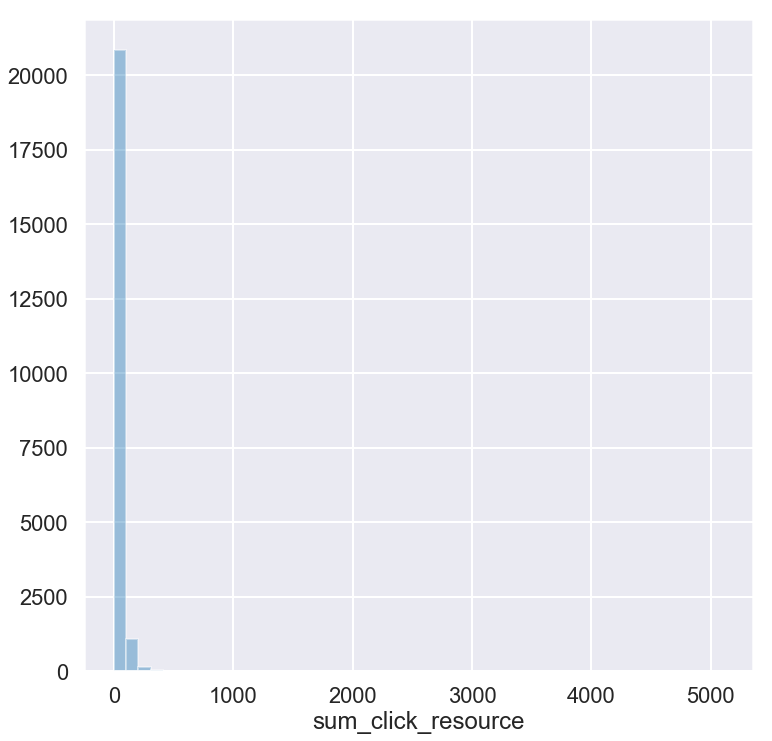

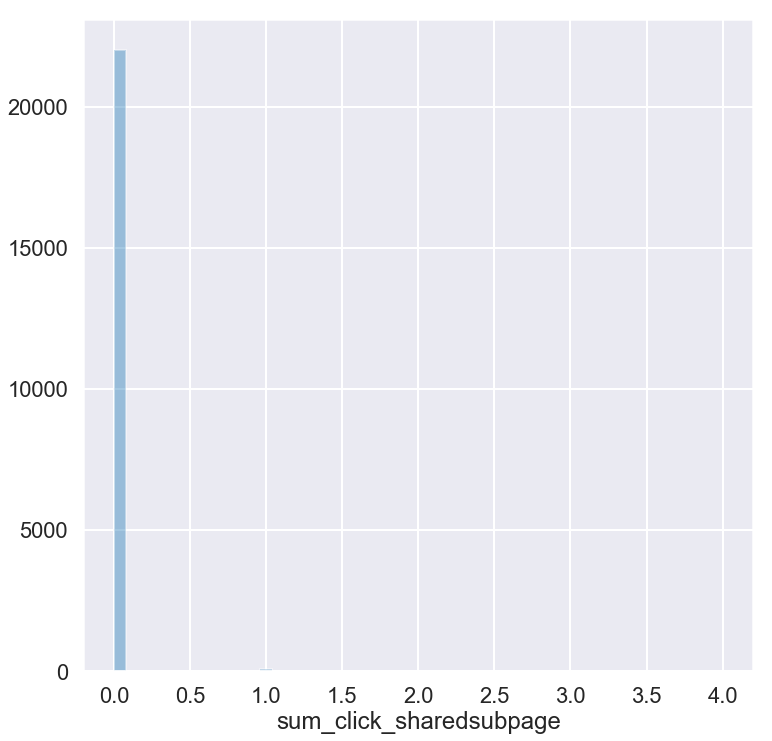

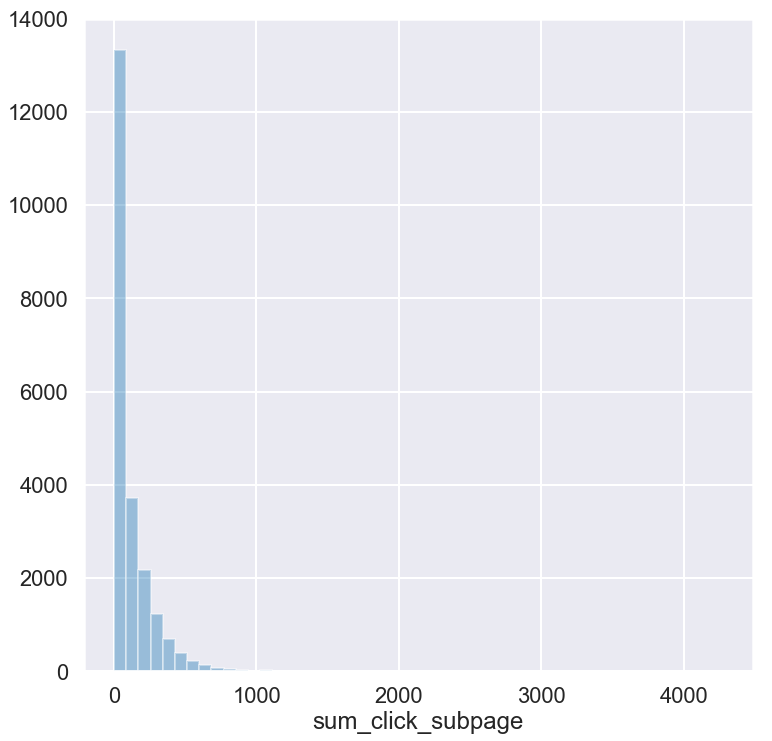

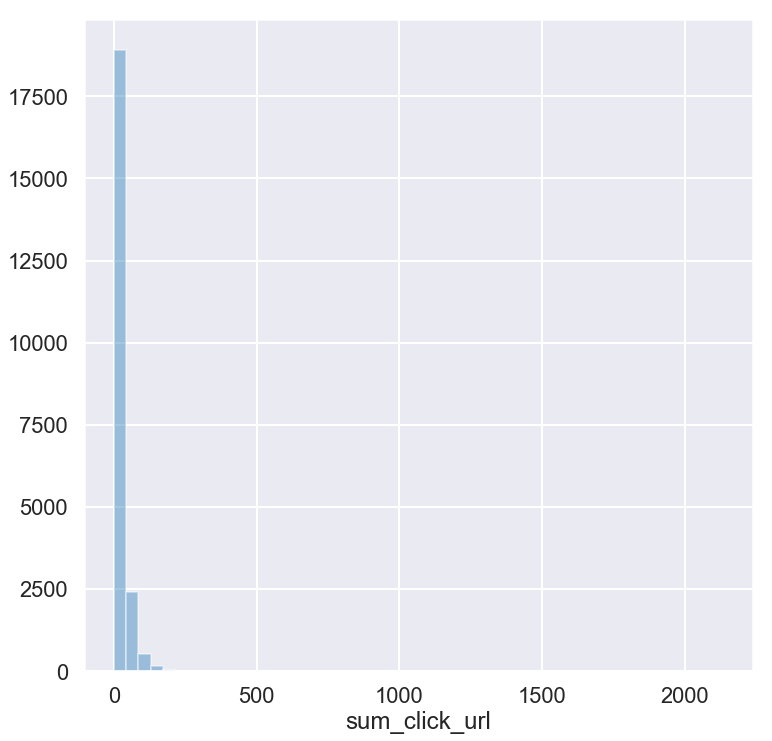

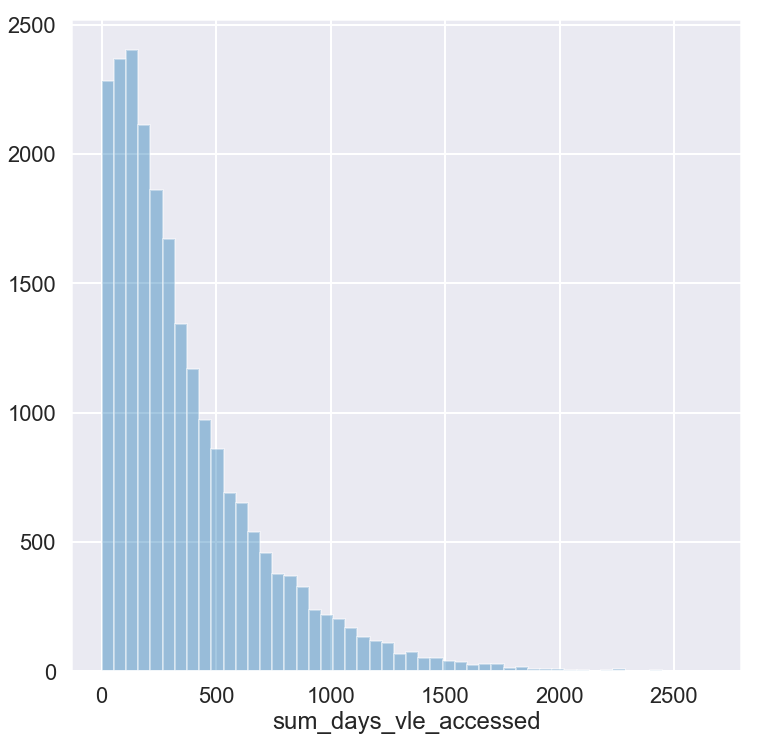

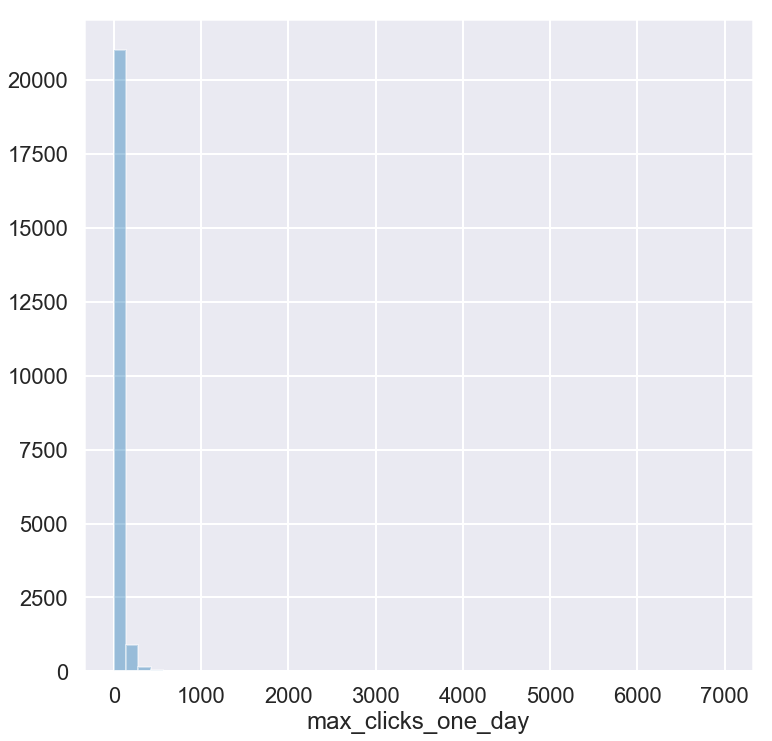

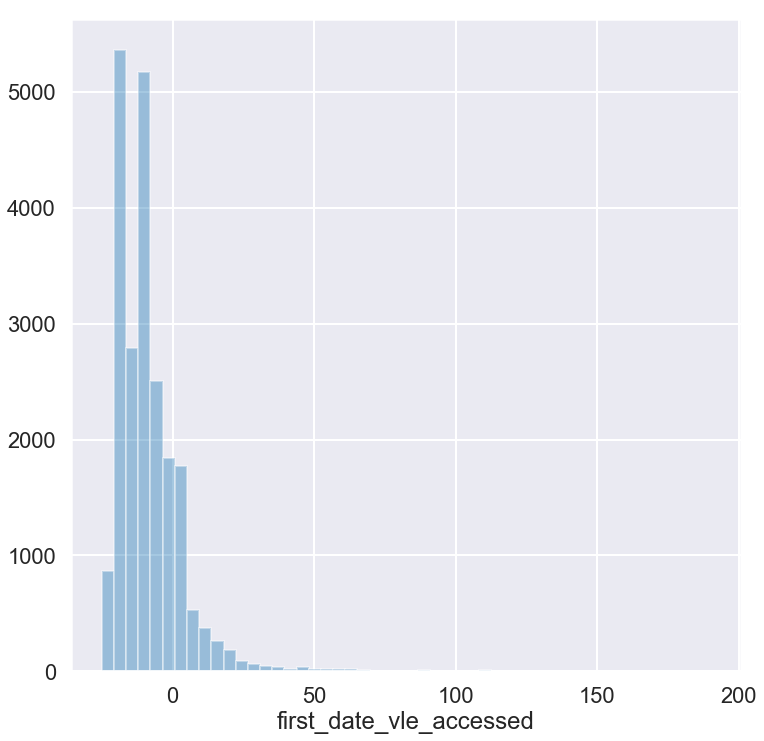

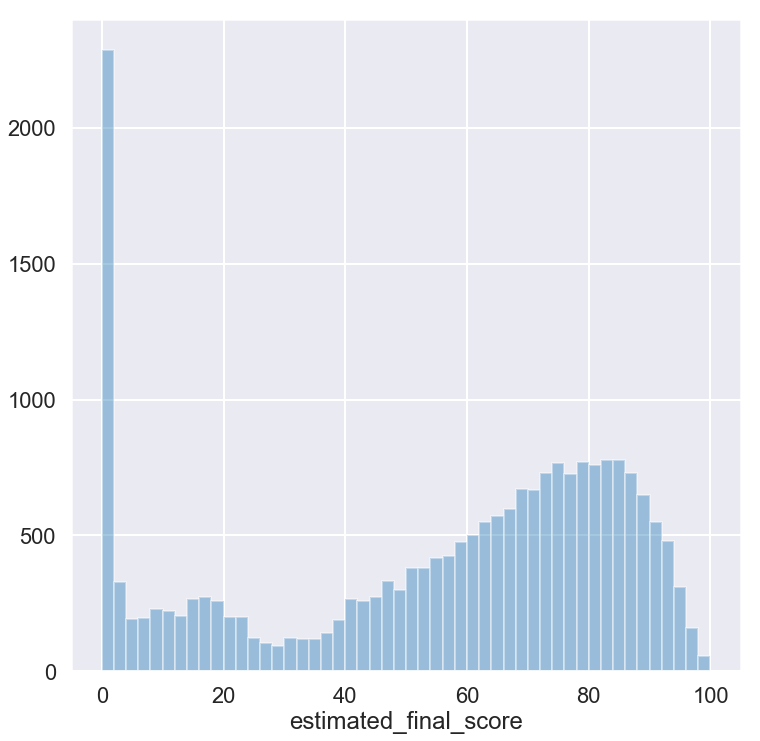

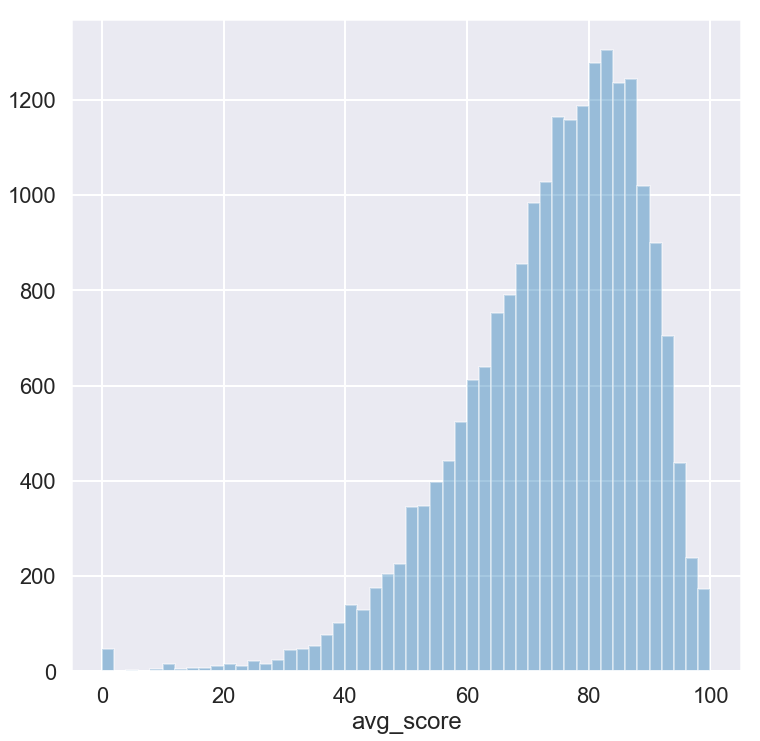

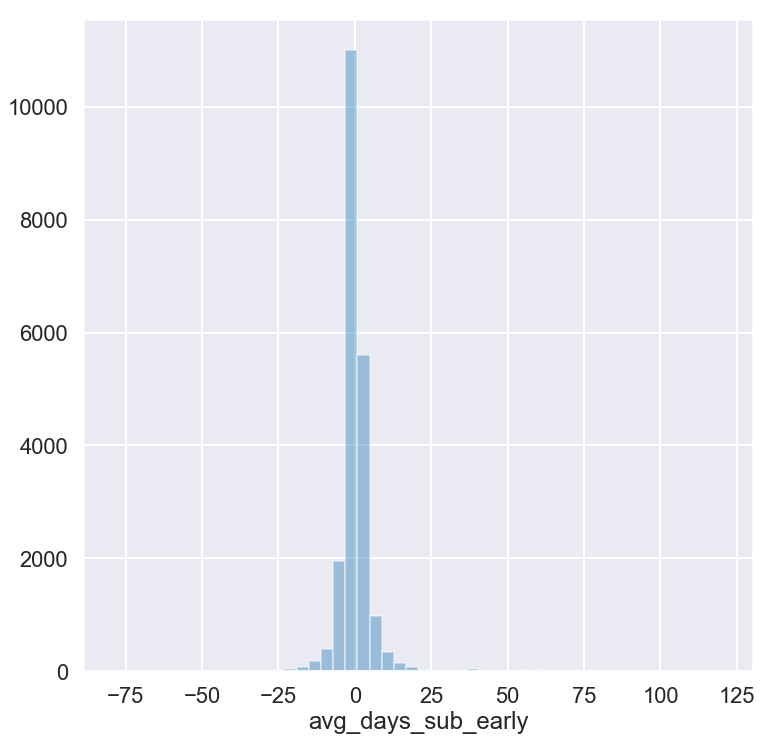

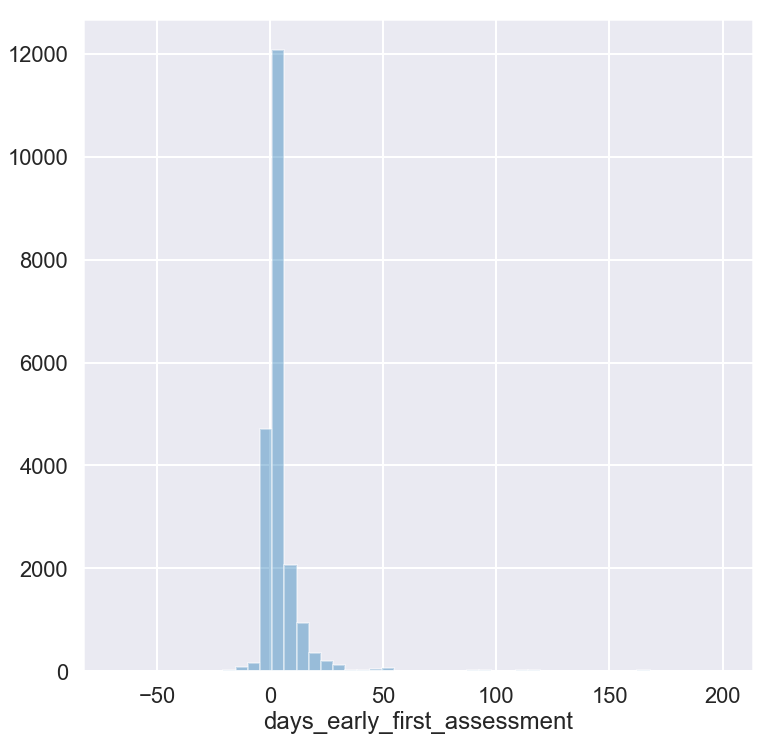

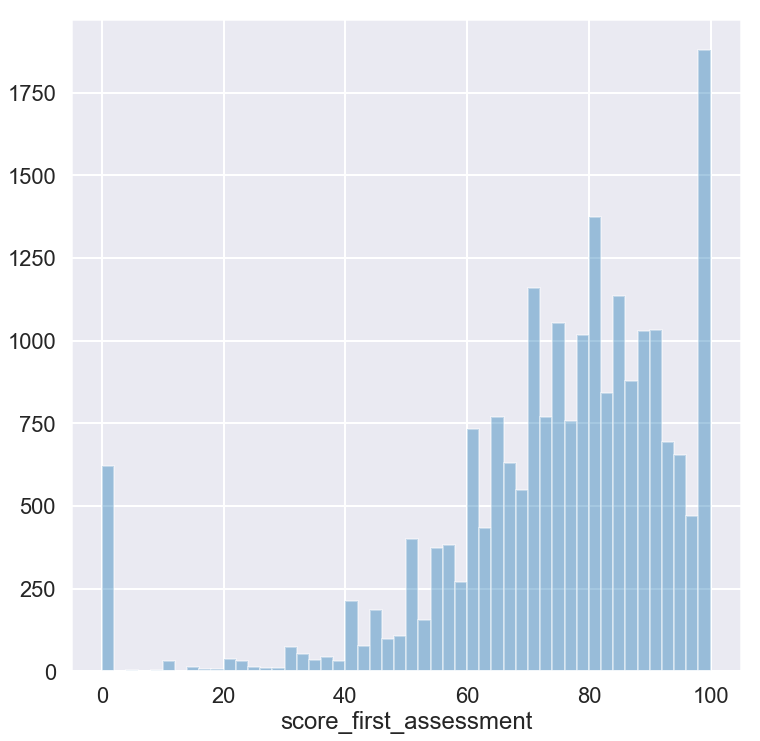

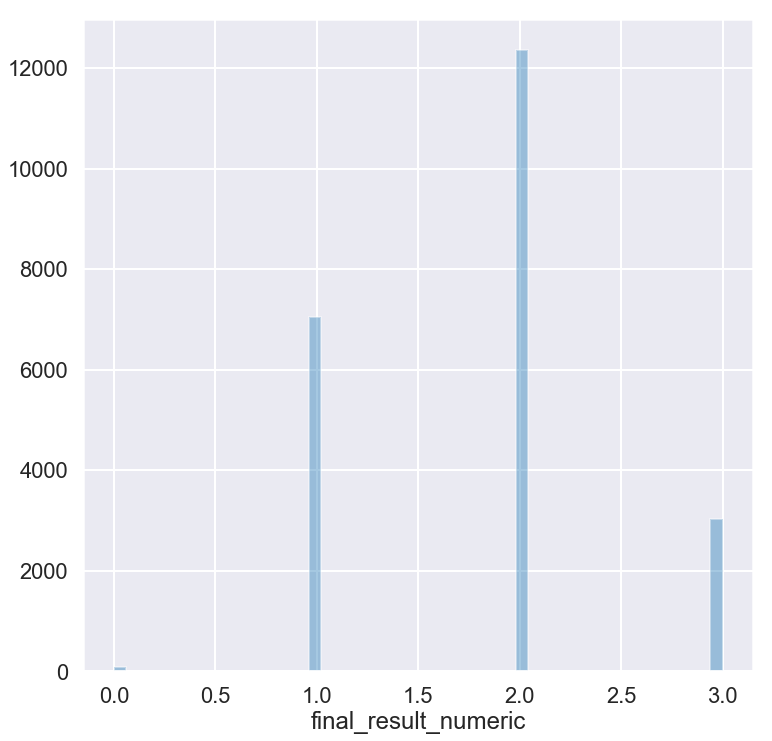

In [179]:
for feat in f:
    plt.figure(figsize=(12,12))
    sns.distplot(df[feat], bins=50, kde=False)